## ISI Epilepsy Brno & Montreal Dataframes with H2o AutoML 

<u>**Goal:**</u> Conduct an exploratory data analysis with the prediction of "SOZ" using H2o AutoML

25/8/2022

---

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import dataset

epilepsy = pd.read_csv('/Users/marek/Desktop/Marek/Jobs/ISI/Work/data/new_isi_data.csv')
# Remove unnamed column: ,index_col=0
epilepsy.head()

,Unnamed: 0,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,...,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,0,583,ra1,0,NON_SOZ,11.0,11,34,22,0.533375,...,0.995615,0.003025,0.985229,0.997413,0.990955,0.004121,0.970733,0.994151,0,0
1,1,583,ra2,0,NON_SOZ,11.0,16,40,49,0.518898,...,0.999169,0.000649,0.996365,0.999503,0.997006,0.001574,0.987965,0.997992,0,0
2,2,583,ra3,0,NON_SOZ,11.0,20,35,61,0.466505,...,0.999172,0.000648,0.996397,0.999509,0.996981,0.001719,0.987949,0.997969,0,0
3,3,583,ra4,0,NON_SOZ,11.0,27,37,66,0.444008,...,0.997592,0.001411,0.991613,0.998744,0.994820,0.002903,0.984822,0.997324,0,0
4,4,583,ra5,0,NON_SOZ,11.0,11,58,63,0.588096,...,0.994437,0.003369,0.981503,0.996723,0.996824,0.001831,0.987556,0.997855,0,0


In [3]:
# Drop index column

epilepsy = epilepsy.loc[:, ~epilepsy.columns.str.contains('^Unnamed')]
epilepsy.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,0,NON_SOZ,11.0,11,34,22,0.533375,0.781969,...,0.995615,0.003025,0.985229,0.997413,0.990955,0.004121,0.970733,0.994151,0,0
1,583,ra2,0,NON_SOZ,11.0,16,40,49,0.518898,0.780688,...,0.999169,0.000649,0.996365,0.999503,0.997006,0.001574,0.987965,0.997992,0,0
2,583,ra3,0,NON_SOZ,11.0,20,35,61,0.466505,0.740345,...,0.999172,0.000648,0.996397,0.999509,0.996981,0.001719,0.987949,0.997969,0,0
3,583,ra4,0,NON_SOZ,11.0,27,37,66,0.444008,0.721173,...,0.997592,0.001411,0.991613,0.998744,0.994820,0.002903,0.984822,0.997324,0,0
4,583,ra5,0,NON_SOZ,11.0,11,58,63,0.588096,0.937518,...,0.994437,0.003369,0.981503,0.996723,0.996824,0.001831,0.987556,0.997855,0,0


In [4]:
# Split epilepsy dataset to Montreal & Brno dataframe

df_montreal, df_brno = [x for _, x in epilepsy.groupby(epilepsy['patient_id'] < 100)]

In [5]:
# Show Brno dataframe

df_brno.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
2723,59,c'1,0,NON_SOZ,31.0,1,0,1,0.065559,0.028801,...,0.622209,0.073566,0.518941,0.857990,0.242008,0.042108,0.195079,0.762719,0,0
2724,59,c'10,0,NON_SOZ,31.0,17,2,4,0.085462,0.029390,...,0.539133,0.084559,0.452234,0.837181,0.250788,0.044006,0.201981,0.761920,0,0
2725,59,c'11,0,NON_SOZ,31.0,4,2,1,0.106158,0.061141,...,0.437290,0.086941,0.361130,0.811687,0.226202,0.045533,0.183037,0.757788,0,0
2726,59,c'12,0,NON_SOZ,31.0,2,1,21,0.062689,0.048549,...,0.239706,0.098879,0.207664,0.782171,0.216491,0.061209,0.177210,0.759349,0,0
2727,59,c'13,0,NON_SOZ,31.0,12,17,31,0.163848,0.058202,...,0.544886,0.086758,0.459412,0.840375,0.275463,0.064708,0.222966,0.764300,0,0


In [6]:
# Show unique Brno patient_id

df_brno.patient_id.unique()

array([59, 61, 63, 66, 67, 69, 71, 73, 74, 77, 80, 81, 82, 84, 88, 89, 90,
       92, 93], dtype=int64)

In [7]:
# Number of patients in Brno

df_brno['patient_id'].nunique()

19

In [8]:
# Number of entries per patient in Brno

df_brno['patient_id'].value_counts().sort_index()

59    2496
61    2416
63    1920
66    2800
67    2464
69    2720
71    2704
73    2816
74    2784
77    2688
80    2624
81    2624
82    1360
84    2768
88    2800
89    2720
90    2816
92    2816
93    2560
Name: patient_id, dtype: int64

In [9]:
# Unique value of outcome per patient in Brno

outcomes_brno = df_brno.groupby(['patient_id'])['outcome'].unique().sort_index()
outcomes_brno

patient_id
59    [31.0]
61    [11.0]
63    [11.0]
66    [41.0]
67    [42.0]
69    [31.0]
71    [11.0]
73    [31.0]
74    [22.0]
77    [11.0]
80    [31.0]
81    [31.0]
82    [11.0]
84    [12.0]
88    [21.0]
89    [11.0]
90    [31.0]
92    [31.0]
93    [11.0]
Name: outcome, dtype: object

In [10]:
# Values & counts of outcomes in Brno

values_brno, counts_brno = np.unique(outcomes_brno, return_counts=True)
values_brno, counts_brno

(array([array([11.]), array([12.]), array([21.]), array([22.]),
        array([31.]), array([41.]), array([42.])], dtype=object),
 array([7, 1, 1, 1, 7, 1, 1], dtype=int64))

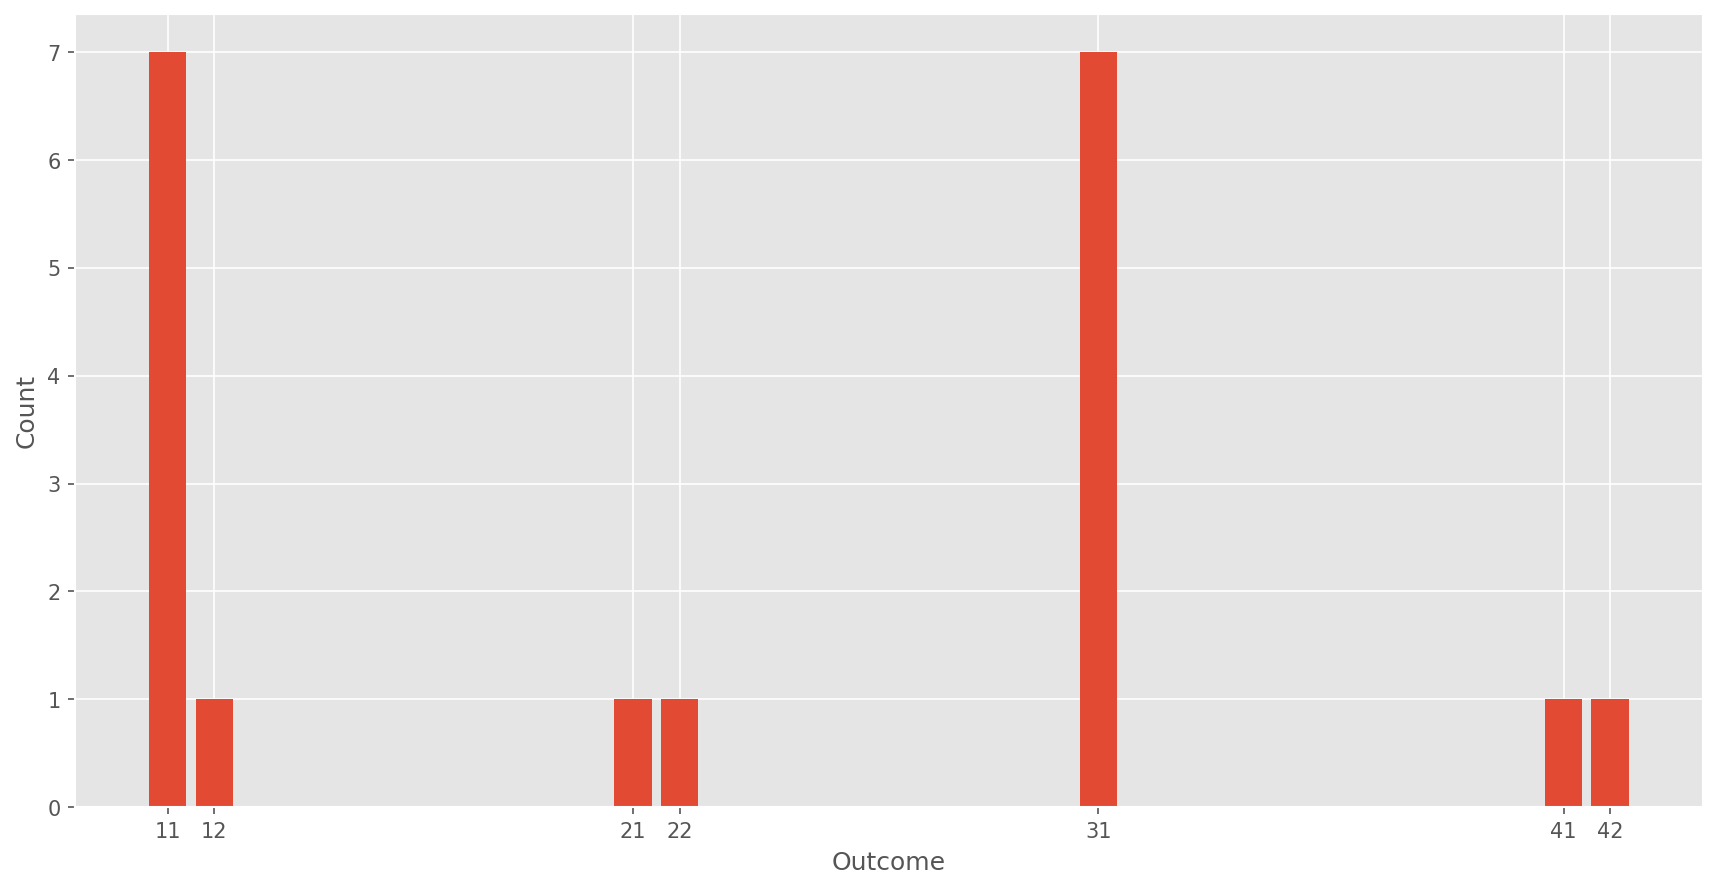

In [12]:
# Show count of outcomes in Brno 

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

plt.bar(values_brno, counts_brno)
plt.style.use('ggplot')
plt.xticks([11,12,21,22,31,41,42])
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 150
plt.ylabel("Count")
plt.xlabel("Outcome");

In [13]:
# Columns names

cols_brno = df_brno.columns
print(list(cols_brno))

['patient_id', 'channel_name', 'resected', 'onset_channel', 'outcome', 'HFO_80.0-250.0', 'HFO_250.0-600.0', 'spike_rate', 'power_1.0-4.0', 'power_4.0-8.0', 'power_8.0-12.0', 'power_12.0-20.0', 'power_20.0-45.0', 'power_65.0-80.0', 'power_80.0-250.0', 'power_250.0-600.0', 'hlx_0.0-0.0', 'hlx_1.0-4.0', 'hlx_4.0-8.0', 'hlx_8.0-12.0', 'hlx_12.0-20.0', 'hlx_20.0-45.0', 'hlx_65.0-80.0', 'hlx_80.0-250.0', 'hlx_250.0-600.0', 'pse', 'pac', 'fac', 'lfr', 'lin_corr_median_0.0-0.0', 'ren_0.0-0.0', 'phase_sync_0.0-0.0', 'coherence_0.0-0.0', 'lin_corr_median_1.0-4.0', 'ren_1.0-4.0', 'phase_sync_1.0-4.0', 'coherence_1.0-4.0', 'lin_corr_median_4.0-8.0', 'ren_4.0-8.0', 'phase_sync_4.0-8.0', 'coherence_4.0-8.0', 'lin_corr_median_8.0-12.0', 'ren_8.0-12.0', 'phase_sync_8.0-12.0', 'coherence_8.0-12.0', 'lin_corr_median_12.0-20.0', 'ren_12.0-20.0', 'phase_sync_12.0-20.0', 'coherence_12.0-20.0', 'lin_corr_median_20.0-45.0', 'ren_20.0-45.0', 'phase_sync_20.0-45.0', 'coherence_20.0-45.0', 'lin_corr_median_65.0

In [14]:
# Keep only segm_type = 4 

df_brno_4 = df_brno.loc[df_brno['segm_type'] == 4]

In [41]:
# Drop columns no. 0, 1, 2, 65 and 66

df_brno_drop = df_brno_4.drop(df_brno_4.columns[[0, 1, 2, 4, 65, 66 ]], axis=1)

In [42]:
# View df_brno_drop dataframe

df_brno_drop.head()

,onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,...,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0
37397,NON_SOZ,0,0,0,0.000295,1.190554e-04,6.815908e-05,8.167788e-05,2.471943e-05,9.073001e-07,...,0.675517,0.909861,0.913286,0.076406,0.936624,0.978465,0.890101,0.015153,0.852096,0.968987
37398,NON_SOZ,0,0,0,0.000032,1.160843e-05,3.875692e-06,6.276924e-06,3.839564e-06,1.399853e-07,...,0.588320,0.881335,0.937528,0.037157,0.918727,0.976702,0.886291,0.014385,0.838765,0.964755
37399,NON_SOZ,0,0,3,0.000002,9.885945e-07,3.123022e-07,5.254314e-07,3.132231e-07,6.296980e-09,...,0.349821,0.820536,0.907596,0.058471,0.896536,0.972099,0.868643,0.014963,0.820277,0.960592
37400,NON_SOZ,0,0,12,0.000002,1.139527e-06,3.693161e-07,6.713428e-07,5.848541e-07,7.960394e-09,...,0.318135,0.816724,0.771523,0.133118,0.801348,0.943377,0.836469,0.031758,0.791367,0.952132
37401,NON_SOZ,2,4,7,0.000002,5.423131e-07,1.421765e-07,1.906757e-07,2.438913e-07,6.064364e-09,...,0.559436,0.874138,0.866887,0.078536,0.850247,0.959434,0.857479,0.033687,0.806496,0.953955


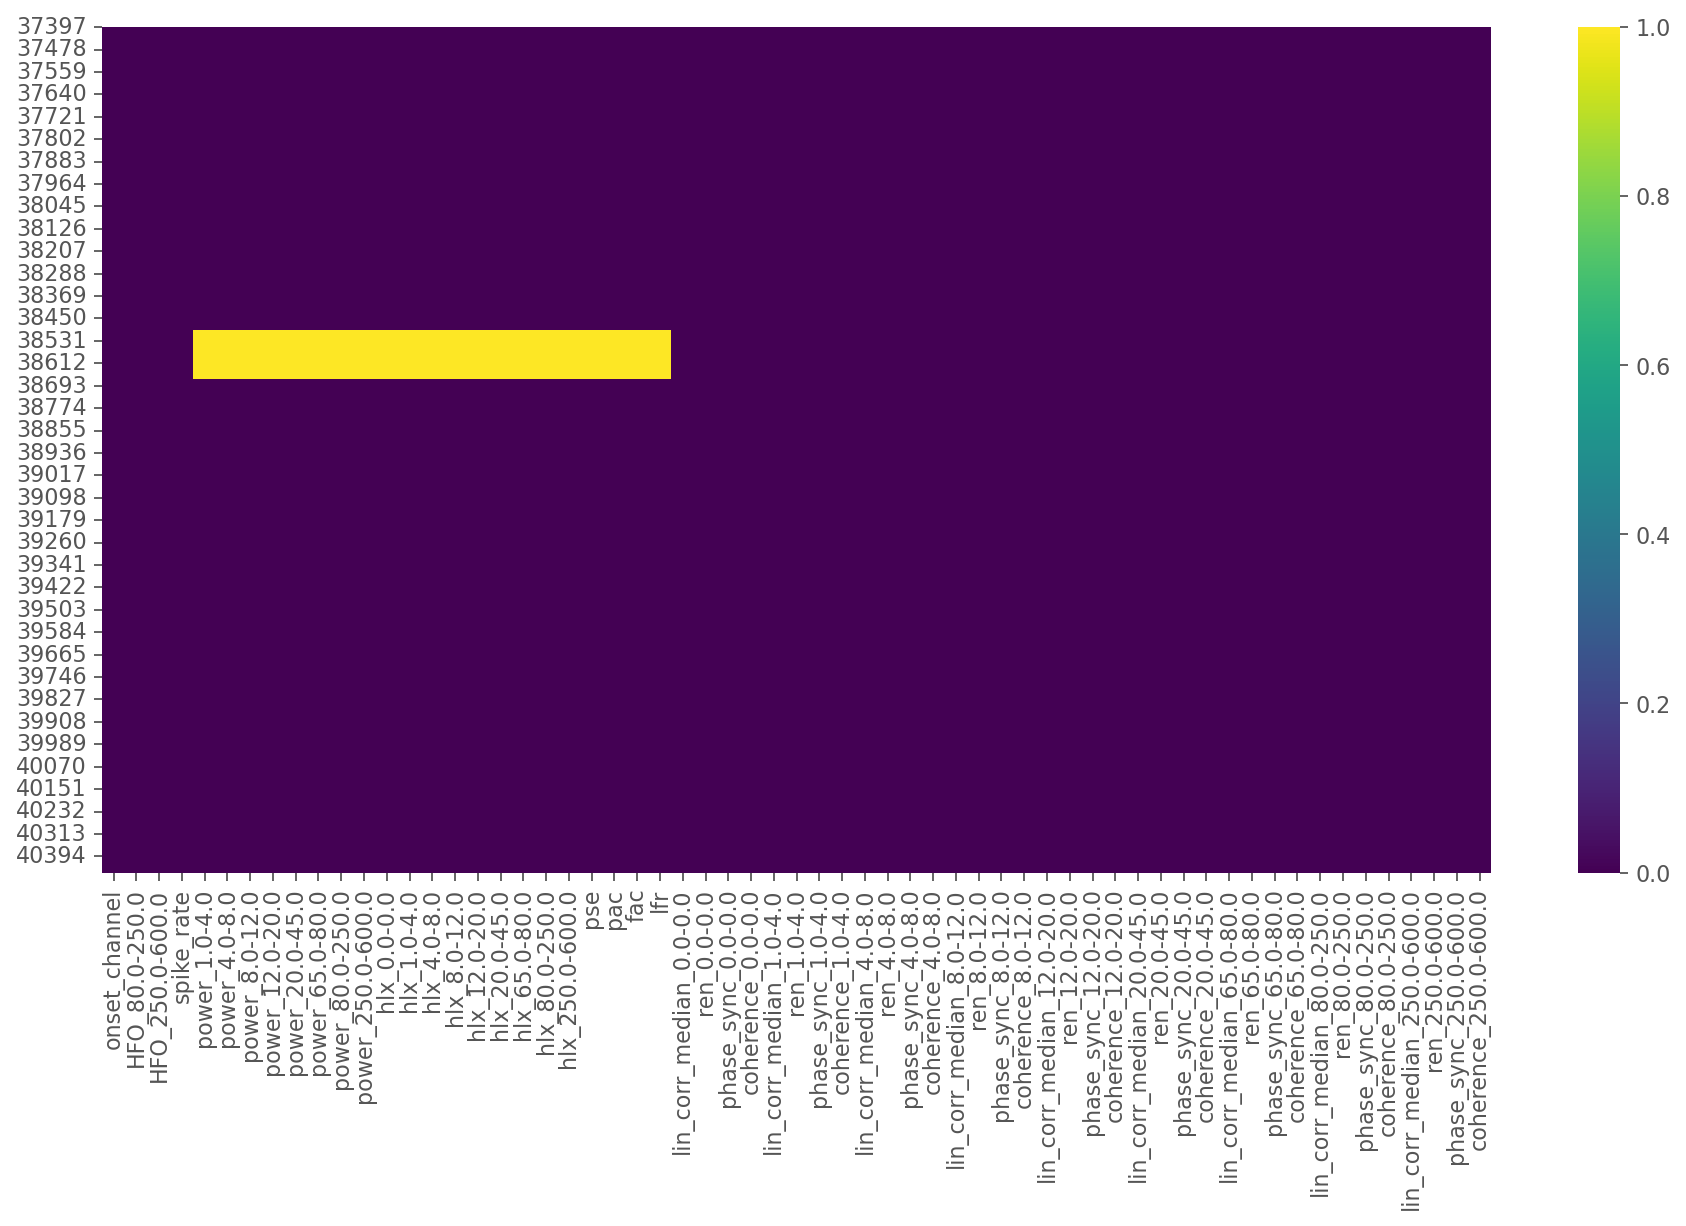

In [43]:
# Show null columns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 160
sns.heatmap(df_brno_drop.isnull(), cmap = 'viridis', cbar = True);

In [44]:
# Show Montreal dataframe

df_montreal.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,0,NON_SOZ,11.0,11,34,22,0.533375,0.781969,...,0.995615,0.003025,0.985229,0.997413,0.990955,0.004121,0.970733,0.994151,0,0
1,583,ra2,0,NON_SOZ,11.0,16,40,49,0.518898,0.780688,...,0.999169,0.000649,0.996365,0.999503,0.997006,0.001574,0.987965,0.997992,0,0
2,583,ra3,0,NON_SOZ,11.0,20,35,61,0.466505,0.740345,...,0.999172,0.000648,0.996397,0.999509,0.996981,0.001719,0.987949,0.997969,0,0
3,583,ra4,0,NON_SOZ,11.0,27,37,66,0.444008,0.721173,...,0.997592,0.001411,0.991613,0.998744,0.994820,0.002903,0.984822,0.997324,0,0
4,583,ra5,0,NON_SOZ,11.0,11,58,63,0.588096,0.937518,...,0.994437,0.003369,0.981503,0.996723,0.996824,0.001831,0.987556,0.997855,0,0


In [45]:
# Show unique Montreal patient_id

df_montreal.patient_id.unique()

array([ 583,  705,  657,  756,  777, 1299, 1446,  761, 1162,  953,  965,
       1002,  873, 1020, 1021, 1029, 1149, 1041, 1159, 1142, 1247, 1233,
        723, 1153, 1246,  617,  909, 1016, 1043,  717,  473, 1218, 1630,
       1718], dtype=int64)

In [46]:
# Number of patients in Montreal

df_montreal['patient_id'].nunique()

34

In [47]:
# Number of entries per patient in Montreal

df_montreal['patient_id'].value_counts().sort_index()

473     1136
583     1392
617      880
657      720
705     1360
717     1136
723     1376
756      912
761     1840
777      576
873     1392
909     1008
953     1408
965     1376
1002    1072
1016    1600
1020     800
1021     944
1029    1456
1041    1712
1043    1136
1142    1408
1149     912
1153    1648
1159    1152
1162     784
1218    1600
1233     848
1246    1744
1247    1392
1299    1232
1446     800
1630    2736
1718    2080
Name: patient_id, dtype: int64

In [48]:
# Unique value of outcome per patient in Montreal

outcomes_montreal = df_montreal.groupby(['patient_id'])['outcome'].unique().sort_index()
outcomes_montreal

patient_id
473     [31.0]
583     [11.0]
617     [31.0]
657     [11.0]
705     [41.0]
717     [11.0]
723     [11.0]
756     [22.0]
761     [41.0]
777     [41.0]
873     [12.0]
909     [32.0]
953     [11.0]
965     [11.0]
1002    [11.0]
1016    [41.0]
1020    [32.0]
1021    [11.0]
1029    [41.0]
1041    [11.0]
1043    [11.0]
1142    [31.0]
1149    [21.0]
1153    [14.0]
1159    [31.0]
1162    [41.0]
1218    [41.0]
1233    [12.0]
1246    [12.0]
1247    [42.0]
1299    [42.0]
1446    [31.0]
1630    [11.0]
1718    [12.0]
Name: outcome, dtype: object

In [49]:
# Values & counts of outcomes in Montreal

values_montreal, counts_montreal = np.unique(outcomes_montreal, return_counts=True)
values_montreal, counts_montreal

(array([array([11.]), array([12.]), array([14.]), array([21.]),
        array([22.]), array([31.]), array([32.]), array([41.]),
        array([42.])], dtype=object),
 array([11,  4,  1,  1,  1,  5,  2,  7,  2], dtype=int64))

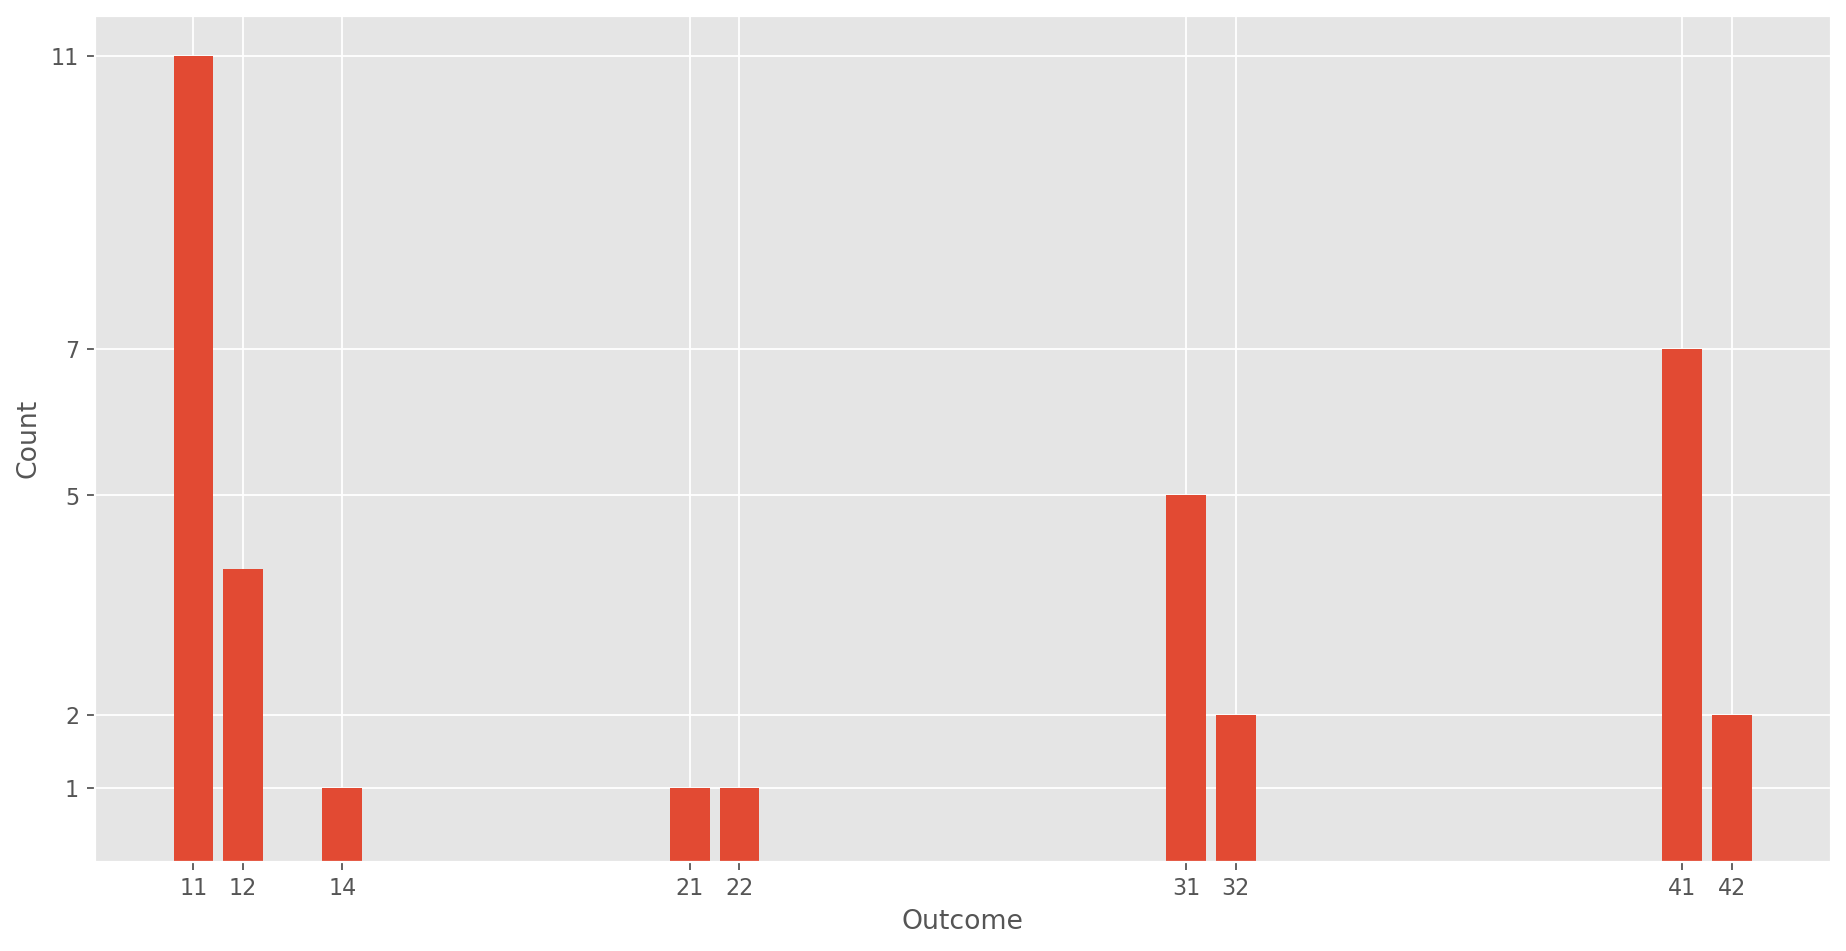

In [50]:
# Show count of outcomes in Montreal

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

plt.bar(values_montreal, counts_montreal)
plt.style.use('ggplot')
plt.xticks([11,12,14,21,22,31,32,41,42])
plt.yticks([1,2,5,7,11])
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 150
plt.ylabel("Count")
plt.xlabel("Outcome");

In [51]:
# Columns names

cols_montreal = df_montreal.columns
print(list(cols_montreal))

['patient_id', 'channel_name', 'resected', 'onset_channel', 'outcome', 'HFO_80.0-250.0', 'HFO_250.0-600.0', 'spike_rate', 'power_1.0-4.0', 'power_4.0-8.0', 'power_8.0-12.0', 'power_12.0-20.0', 'power_20.0-45.0', 'power_65.0-80.0', 'power_80.0-250.0', 'power_250.0-600.0', 'hlx_0.0-0.0', 'hlx_1.0-4.0', 'hlx_4.0-8.0', 'hlx_8.0-12.0', 'hlx_12.0-20.0', 'hlx_20.0-45.0', 'hlx_65.0-80.0', 'hlx_80.0-250.0', 'hlx_250.0-600.0', 'pse', 'pac', 'fac', 'lfr', 'lin_corr_median_0.0-0.0', 'ren_0.0-0.0', 'phase_sync_0.0-0.0', 'coherence_0.0-0.0', 'lin_corr_median_1.0-4.0', 'ren_1.0-4.0', 'phase_sync_1.0-4.0', 'coherence_1.0-4.0', 'lin_corr_median_4.0-8.0', 'ren_4.0-8.0', 'phase_sync_4.0-8.0', 'coherence_4.0-8.0', 'lin_corr_median_8.0-12.0', 'ren_8.0-12.0', 'phase_sync_8.0-12.0', 'coherence_8.0-12.0', 'lin_corr_median_12.0-20.0', 'ren_12.0-20.0', 'phase_sync_12.0-20.0', 'coherence_12.0-20.0', 'lin_corr_median_20.0-45.0', 'ren_20.0-45.0', 'phase_sync_20.0-45.0', 'coherence_20.0-45.0', 'lin_corr_median_65.0

In [54]:
# Keep only segm_type = 4 

df_montreal_4 = df_montreal.loc[df_montreal['segm_type'] == 4]

In [55]:
# Drop columns no. 0, 1, 2, 4, 65 and 66

df_montreal_drop = df_montreal_4.drop(df_montreal_4.columns[[0, 1, 2, 4, 65, 66 ]], axis=1)

In [56]:
# View df_brno_drop dataframe

df_montreal_drop.head()

,onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,...,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_number
34674,NON_SOZ,19,56,50,0.526201,0.474988,0.309262,0.364289,0.237353,0.007892,...,0.994984,0.986394,0.008171,0.962278,0.992315,0.951701,0.015386,0.894617,0.968141,0
34675,NON_SOZ,35,62,86,0.560877,0.560381,0.374400,0.447637,0.290251,0.009658,...,0.999653,0.997199,0.001929,0.989986,0.998410,0.982513,0.007849,0.952962,0.988048,0
34676,NON_SOZ,36,66,101,0.558763,0.576171,0.389969,0.467600,0.301467,0.009999,...,0.999641,0.997173,0.002038,0.989737,0.998386,0.982065,0.007308,0.951814,0.987657,0
34677,NON_SOZ,47,66,102,0.554024,0.565439,0.381853,0.453898,0.290972,0.009569,...,0.998245,0.992253,0.005044,0.975965,0.995656,0.975849,0.009962,0.941062,0.984107,0
34678,NON_SOZ,32,75,96,0.649021,0.658895,0.427324,0.507019,0.320779,0.010582,...,0.991911,0.978247,0.009224,0.944790,0.987954,0.980963,0.007094,0.949647,0.986945,0


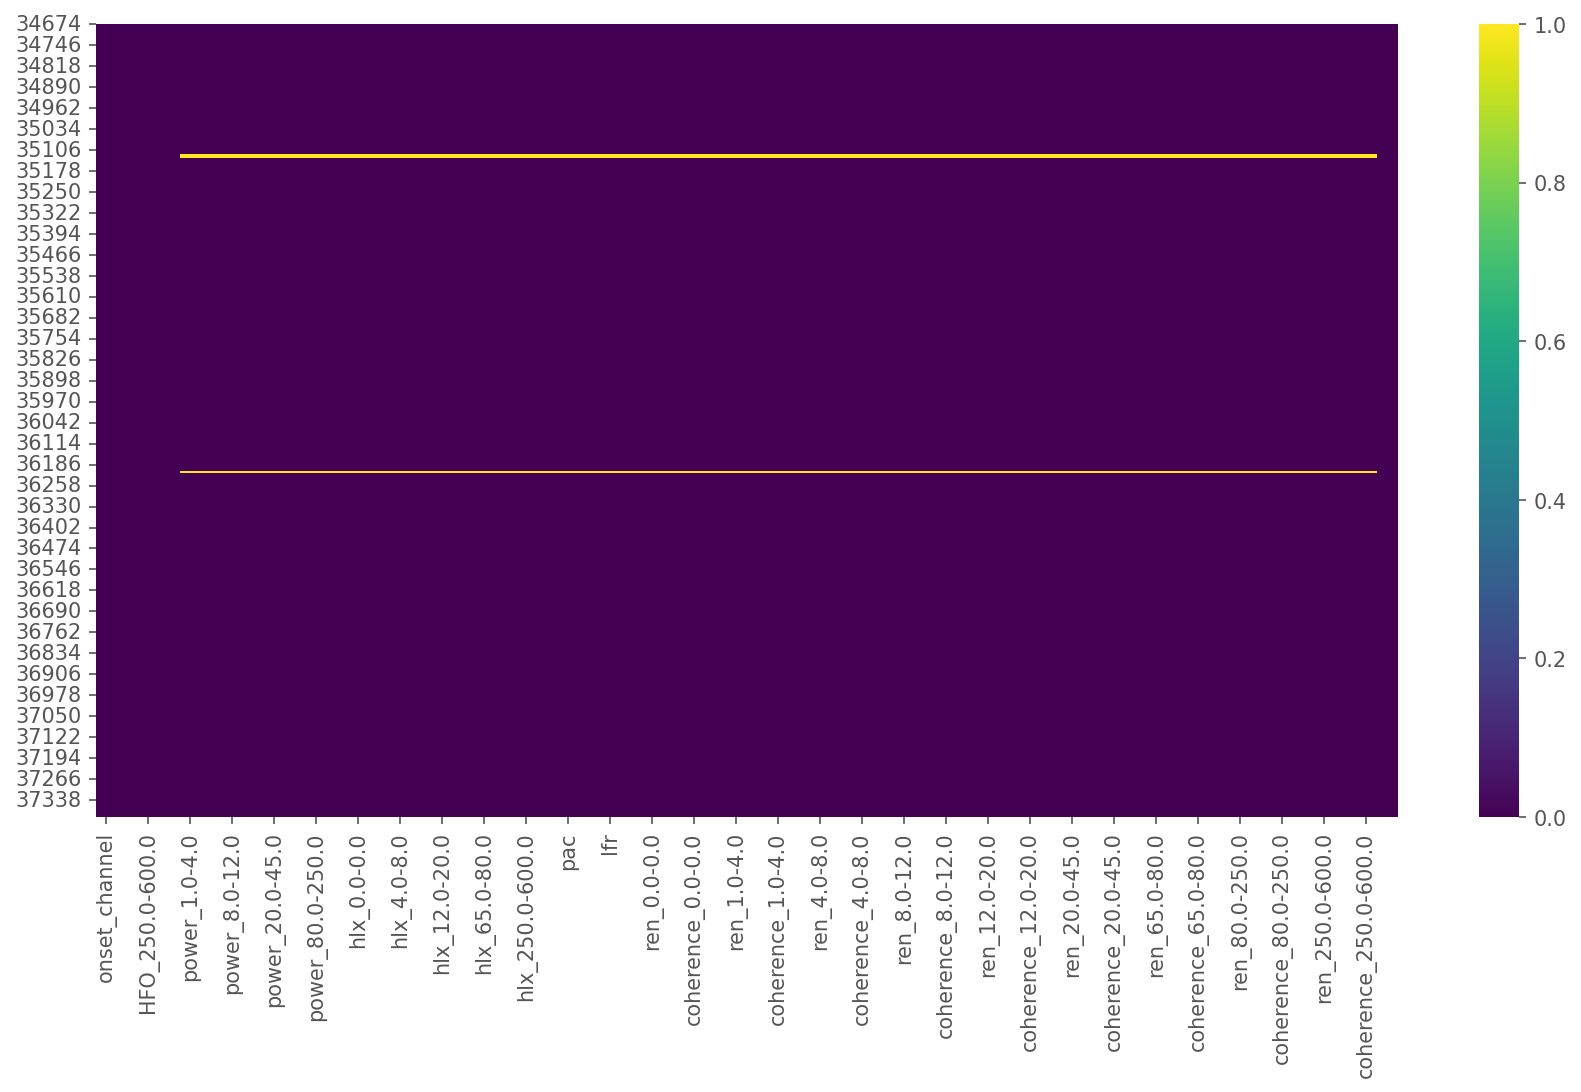

In [57]:
# Show null columns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 150
sns.heatmap(df_montreal_drop.isnull(), cmap = 'viridis', cbar = True);

## CLASSIFICATION PROBLEM
Predicting "Onset_channel" in Brno dataframe split by .75 ratio

In [58]:
# Start H2o

import h2o 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,20 mins 00 secs
H2O_cluster_timezone:,Europe/Prague
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,2 months and 26 days
H2O_cluster_name:,H2O_from_python_Rodina_md6mv8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.428 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [59]:
# Parse dataframe df_brno_drop to H2o

h2o_df = h2o.H2OFrame(df_brno_drop)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [60]:
# Dataframe summary describe

h2o_df.describe()

Rows:3056
Cols:61




,onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0
type,enum,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,,0.0,0.0,0.0,7.575737412001238e-09,9.39071455713289e-10,2.2580753647520856e-10,2.9313634416697126e-10,1.7174411146477239e-10,3.4960783522950397e-12,1.058213811237117e-11,1.59087007998756e-11,3.576624550819397,1.163362069527308,1.0465110874176025,1.0155952588717143,1.0208533201615015,1.0652102601528168,1.0050114794572194,1.127194520632426,1.036214944124222,7.406156223213301e-08,-0.0171302647654522,-0.0402676524848168,0.0006176133595538,-0.5421305097146736,0.0005341483543512,0.2648637568174551,0.7342044736941655,-0.6001673864743983,9.09226419416124e-05,0.4522237581635515,0.8199521092077097,-0.4964481848354141,0.0001237474834382,0.3900679938495159,0.8035693590839704,-0.4686981505885099,0.000147934873906,0.3853309563640505,0.8187951083978017,-0.5279447360134994,0.0001099778111987,0.267083690110594,0.7843798479437828,-0.5645505384852488,0.0002652073421753,0.1676823359541595,0.7805999304850896,-0.6283222513583799,0.0010038206105309,0.2004972866674264,0.787879088918368,-0.4798300272598862,0.0021554876238102,0.0754280395122865,0.4744643740852673,-0.8154961961011092,0.0063285267257985,0.0508136284848054,0.5353593720992407
mean,,20.91753926701571,21.469240837696326,26.54875654450259,0.013156757491401931,0.005687827954091462,0.0022032441747807502,0.001623064132652359,0.0009137828041296432,1.942477749604776e-05,3.8132698032082385e-05,1.1983765118216587e-05,27.075401346105107,1.3056759465091234,1.0695130597528932,1.023387222944517,1.0356638089686077,1.0974249644963847,1.0063033844672733,1.2209267372782844,1.099583616513416,0.024311412741200703,0.0007690403380551546,0.0006852252631149319,0.07459030318712986,0.7500199181245127,0.19414770070672474,0.9798583058769765,0.9913306679441257,0.7470743427805667,0.22518607777401228,0.8006849944217289,0.9422184274206702,0.768540388751151,0.1084618454435448,0.7846642239010557,0.9405850321115446,0.7693937026396299,0.07351838614261977,0.7775860798279799,0.9392852368304092,0.767114919376222,0.06621385628851732,0.7488146568839498,0.9321404169208686,0.7248469521555596,0.08166407919487137,0.672457721494918,0.9108719206630236,0.6193812409534666,0.05192485961339235,0.5729211779576346,0.8836282576097524,0.5633870330773619,0.11498827427690274,0.48808519417386353,0.8539632418500364,0.41284241804503474,0.05593470709292117,0.347410780376407,0.8054376757498379
maxs,,121.0,265.0,724.0,0.4126239584228308,0.2341951462165482,0.1465668297777644,0.1397286810546719,0.0632154572952687,0.0011920135947337,0.0025143651516104,0.0010941603535147,125.31341580708822,1.4326618758837382,1.084064398407936,1.030919371644656,1.047824371258418,1.117235488295555,1.007162509957949,1.300721081495285,1.1669275335470837,0.

In [61]:
# Split train and test sets

train, test = h2o_df.split_frame(ratios=[.75], seed=121)

# Define X and y

X = train.columns
y = 'onset_channel'
X.remove(y)

In [62]:
# For binary classification, response should be a factor

train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
y

'onset_channel'

In [63]:
# Review dataframe if balanced or not 

df_brno_drop.onset_channel.value_counts()

NON_SOZ    2924
SOZ         132
Name: onset_channel, dtype: int64

In [64]:
# Import H2o AutoML

from h2o.automl import H2OAutoML

In [65]:
# Run H2o AutoML for 600 secs = 10 minutes

aml = H2OAutoML(max_runtime_secs=600,   
                balance_classes=True,
                stopping_metric='AUC',
                seed=121) 


%time aml.train(x=X, y=y, training_frame = train)

AutoML progress: |██
19:44:46.558: AutoML: XGBoost is not available; skipping it.

█████████████████████████████████████████████████████████████| (done) 100%
Wall time: 10min 50s
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_7_AutoML_2_20220821_194446

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.006598932186410693
RMSE: 0.08123381184217994
LogLoss: 0.04180319992915454
Null degrees of freedom: 2286
Residual degrees of freedom: 2282
Null deviance: 802.9217777203784
Residual deviance: 191.2078364759529
AIC: 201.2078364759529
AUC: 0.9999529256696325
AUCPR: 0.99891385294433
Gini: 0.9999058513392649

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49002975373386404: 


,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,2188.0,2.0,0.0009,(2.0/2190.0)
1,SOZ,0.0,97.0,0.0,(0.0/97.0)
2,Total,2188.0,99.0,0.0009,(2.0/2287.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.490030,0.989796,81.0
1,max f2,0.490030,0.995893,81.0
2,max f0point5,0.545324,0.987526,78.0
3,max accuracy,0.490030,0.999125,81.0
4,max precision,0.948310,1.000000,0.0
5,max recall,0.490030,1.000000,81.0
6,max specificity,0.948310,1.000000,0.0
7,max absolute_mcc,0.490030,0.989395,81.0
8,max min_per_class_accuracy,0.490030,0.999087,81.0
9,max mean_per_class_accuracy,0.490030,0.999543,81.0



Gains/Lift Table: Avg response rate:  4.24 %, avg score:  6.14 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010057,0.865145,23.577320,23.577320,1.000000,0.901690,1.000000,0.901690,0.237113,0.237113,2257.731959,2257.731959,0.237113
1,2,0.020114,0.818810,23.577320,23.577320,1.000000,0.845118,1.000000,0.873404,0.237113,0.474227,2257.731959,2257.731959,0.474227
2,3,0.030171,0.715399,23.577320,23.577320,1.000000,0.787535,1.000000,0.844781,0.237113,0.711340,2257.731959,2257.731959,0.711340
3,4,0.040227,0.571579,22.552219,23.321044,0.956522,0.643014,0.989130,0.794339,0.226804,0.938144,2155.221874,2232.104437,0.937688
4,5,0.050284,0.330955,6.150605,19.886957,0.260870,0.448023,0.843478,0.725076,0.061856,1.000000,515.060511,1888.695652,0.991781
5,6,0.100131,0.110958,0.000000,9.986900,0.000000,0.184510,0.423581,0.455973,0.000000,1.000000,-100.000000,898.689956,0.939726
6,7,0.149978,0.063699,0.000000,6.667638,0.000000,0.083118,0.282799,0.332051,0.000000,1.000000,-100.000000,566.763848,0.887671
7,8,0.200262,0.044307,0.000000,4.993450,0.000000,0.052851,0.211790,0.261946,0.000000,1.000000,-100.000000,399.344978,0.835160
8,9,0.299956,0.024619,0.000000,3.333819,0.000000,0.032915,0.141399,0.185825,0.000000,1.000000,-100.000000,233.381924,0.731050
9,10,0.400087,0.015716,0.000000,2.499454,0.000000,0.019839,0.106011,0.144283,0.000000,1.000000,-100.000000,149.945355,0.626484




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.030871335164375263
RMSE: 0.17570240511835705
LogLoss: 0.11373532156276098
Null degrees of freedom: 2286
Residual degrees of freedom: 2282
Null deviance: 808.7548901782013
Residual deviance: 520.2253608280688
AIC: 530.2253608280688
AUC: 0.9120180765428612
AUCPR: 0.4065033455371839
Gini: 0.8240361530857223

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17857003893720244: 


,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,2112.0,78.0,0.0356,(78.0/2190.0)
1,SOZ,42.0,55.0,0.433,(42.0/97.0)
2,Total,2154.0,133.0,0.0525,(120.0/2287.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.178570,0.478261,119.0
1,max f2,0.102089,0.553719,170.0
2,max f0point5,0.440458,0.494881,45.0
3,max accuracy,0.509659,0.962396,35.0
4,max precision,0.858598,1.000000,0.0
5,max recall,0.003504,1.000000,378.0
6,max specificity,0.858598,1.000000,0.0
7,max absolute_mcc,0.178570,0.457589,119.0
8,max min_per_class_accuracy,0.040013,0.835052,255.0
9,max mean_per_class_accuracy,0.058960,0.840190,223.0



Gains/Lift Table: Avg response rate:  4.24 %, avg score:  4.21 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010057,0.592415,15.376513,15.376513,0.652174,0.681129,0.652174,0.681129,0.154639,0.154639,1437.651277,1437.651277,0.150986
1,2,0.020114,0.444304,12.301210,13.838861,0.521739,0.535175,0.586957,0.608152,0.123711,0.278351,1130.121022,1283.886150,0.269675
2,3,0.030171,0.332193,6.150605,11.276109,0.260870,0.386721,0.478261,0.534342,0.061856,0.340206,515.060511,1027.610937,0.323768
3,4,0.040227,0.272404,8.200807,10.507284,0.347826,0.305608,0.445652,0.477158,0.082474,0.422680,720.080681,950.728373,0.399393
4,5,0.050284,0.208200,6.150605,9.635948,0.260870,0.235533,0.408696,0.428833,0.061856,0.484536,515.060511,863.594801,0.453486
5,6,0.100131,0.096459,4.136372,6.898168,0.175439,0.142194,0.292576,0.286140,0.206186,0.690722,313.637186,589.816774,0.616749
6,7,0.149978,0.060497,2.068186,5.292868,0.087719,0.076729,0.224490,0.216540,0.103093,0.793814,106.818593,429.286766,0.672353
7,8,0.200262,0.038458,1.025101,4.221267,0.043478,0.047163,0.179039,0.174011,0.051546,0.845361,2.510085,322.126683,0.673671
8,9,0.299956,0.021268,0.723865,3.058865,0.030702,0.028392,0.129738,0.125613,0.072165,0.917526,-27.613492,205.886508,0.644923
9,10,0.400087,0.012268,0.102958,2.319081,0.004367,0.016333,0.098361,0.098263,0.010309,0.927835,-89.704227,131.908062,0.551123




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.956715,0.011461,0.956897,0.951435,0.971678,0.962389,0.941176
1,auc,0.910263,0.024897,0.905903,0.870810,0.912039,0.934204,0.928361
2,err,0.043285,0.011461,0.043103,0.048565,0.028322,0.037611,0.058824
3,err_count,19.800000,5.263079,20.000000,22.000000,13.000000,17.000000,27.000000
4,f0point5,0.495113,0.080888,0.539216,0.363636,0.471698,0.539216,0.561798
5,f1,0.508152,0.077849,0.523810,0.421053,0.434783,0.564103,0.597015
6,f2,0.528165,0.090266,0.509259,0.500000,0.403226,0.591398,0.636943
7,lift_top_group,16.386446,6.612998,12.654546,25.885714,14.123077,20.088888,9.180000
8,logloss,0.113196,0.023323,0.123435,0.099167,0.094141,0.099617,0.149621
9,max_per_class_error,0.453236,0.109092,0.500000,0.428571,0.615385,0.388889,0.333333



See the whole table with table.as_data_frame()


In [66]:
# H2o AutoML leaderboard 

lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_7_AutoML_2_20220821_194446,0.912018,0.113735,0.406503,0.234303,0.175702,0.0308713
StackedEnsemble_BestOfFamily_5_AutoML_2_20220821_194446,0.911769,0.114234,0.396717,0.275444,0.175992,0.0309732
StackedEnsemble_BestOfFamily_4_AutoML_2_20220821_194446,0.91142,0.109859,0.463189,0.267093,0.170563,0.0290918
StackedEnsemble_AllModels_4_AutoML_2_20220821_194446,0.911284,0.110201,0.466455,0.249214,0.171459,0.0293983
StackedEnsemble_AllModels_6_AutoML_2_20220821_194446,0.911258,0.109985,0.463192,0.251497,0.171246,0.0293253
StackedEnsemble_Best1000_1_AutoML_2_20220821_194446,0.908732,0.111158,0.473588,0.294368,0.171365,0.0293658
StackedEnsemble_AllModels_3_AutoML_2_20220821_194446,0.903413,0.110701,0.473799,0.276489,0.170088,0.02893
DeepLearning_grid_2_AutoML_2_20220821_194446_model_1,0.902617,0.235236,0.341655,0.265459,0.197278,0.0389186
GBM_2_AutoML_2_20220821_194446,0.899574,0.160748,0.416771,0.295149,0.19186,0.0368102
GBM_grid_1_AutoML_2_20220821_194446_model_11,0.898534,0.149098,0.366193,0.304088,0.191947,0.0368436


In [67]:
# Explain a single H2O model (e.g. leader model from AutoML)

#exm = aml.leader.explain(test)

In [79]:
# Leader Deep Learning(DL) model 

model = h2o.get_model('StackedEnsemble_BestOfFamily_7_AutoML_2_20220821_194446')

In [80]:
# Use Dl model on test set

model.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.035158627145634
RMSE: 0.1875063389478713
LogLoss: 0.12849834539259133
Null degrees of freedom: 768
Residual degrees of freedom: 764
Null deviance: 284.8421620259219
Residual deviance: 197.63045521380545
AIC: 207.63045521380545
AUC: 0.8981899571817828
AUCPR: 0.33186133471185886
Gini: 0.7963799143635657

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22489069192142042: 


,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,705.0,29.0,0.0395,(29.0/734.0)
1,SOZ,14.0,21.0,0.4,(14.0/35.0)
2,Total,719.0,50.0,0.0559,(43.0/769.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.224891,0.494118,48.0
1,max f2,0.138510,0.568182,78.0
2,max f0point5,0.224891,0.446809,48.0
3,max accuracy,0.771859,0.955787,2.0
4,max precision,0.771859,0.666667,2.0
5,max recall,0.013316,1.000000,307.0
6,max specificity,0.803661,0.998638,0.0
7,max absolute_mcc,0.224891,0.473806,48.0
8,max min_per_class_accuracy,0.065390,0.820163,152.0
9,max mean_per_class_accuracy,0.105403,0.828494,106.0



Gains/Lift Table: Avg response rate:  4.55 %, avg score:  5.65 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010403,0.538075,10.985714,10.985714,0.500000,0.676364,0.500000,0.676364,0.114286,0.114286,998.571429,998.571429,0.108836
1,2,0.020806,0.470488,5.492857,8.239286,0.250000,0.494694,0.375000,0.585529,0.057143,0.171429,449.285714,723.928571,0.157805
2,3,0.031209,0.408925,13.732143,10.070238,0.625000,0.434420,0.458333,0.535160,0.142857,0.314286,1273.214286,907.023810,0.296575
3,4,0.040312,0.365397,3.138776,8.505069,0.142857,0.388649,0.387097,0.502077,0.028571,0.342857,213.877551,750.506912,0.316972
4,5,0.050715,0.297910,8.239286,8.450549,0.375000,0.328460,0.384615,0.466463,0.085714,0.428571,723.928571,745.054945,0.395874
5,6,0.100130,0.141681,5.203759,6.848237,0.236842,0.195003,0.311688,0.332496,0.257143,0.685714,420.375940,584.823748,0.613507
6,7,0.150845,0.098470,1.690110,5.114039,0.076923,0.120585,0.232759,0.261250,0.085714,0.771429,69.010989,411.403941,0.650175
7,8,0.200260,0.068790,0.578195,3.994805,0.026316,0.082497,0.181818,0.217142,0.028571,0.800000,-42.180451,299.480519,0.628338
8,9,0.300390,0.037669,0.570686,2.853432,0.025974,0.050114,0.129870,0.161466,0.057143,0.857143,-42.931354,185.343228,0.583301
9,10,0.400520,0.024639,0.570686,2.282746,0.025974,0.029996,0.103896,0.128599,0.057143,0.914286,-42.931354,128.274583,0.538264


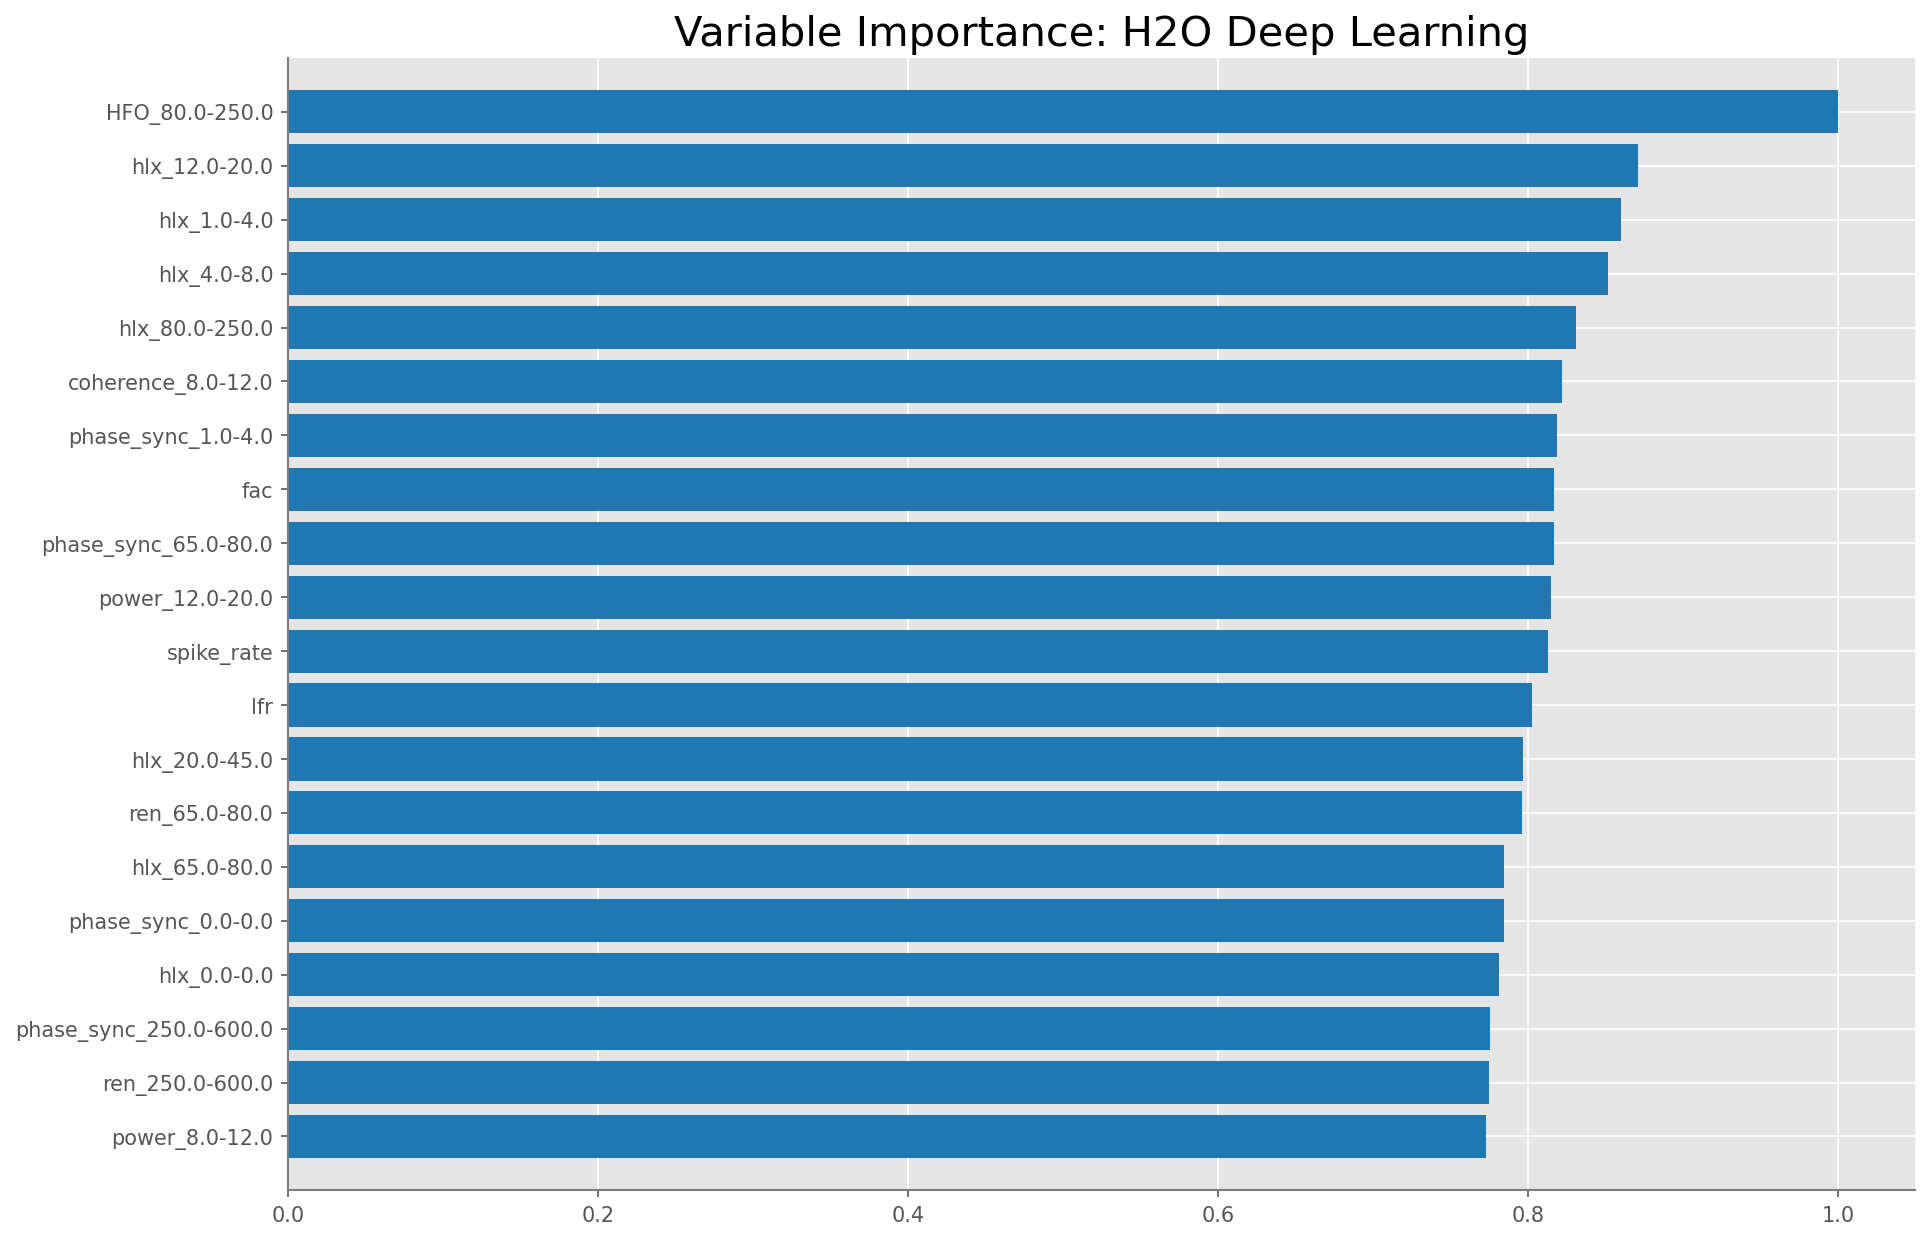

<Figure size 2100x1050 with 0 Axes>

In [70]:
# Show variable importance

model.varimp_plot(num_of_features=20)

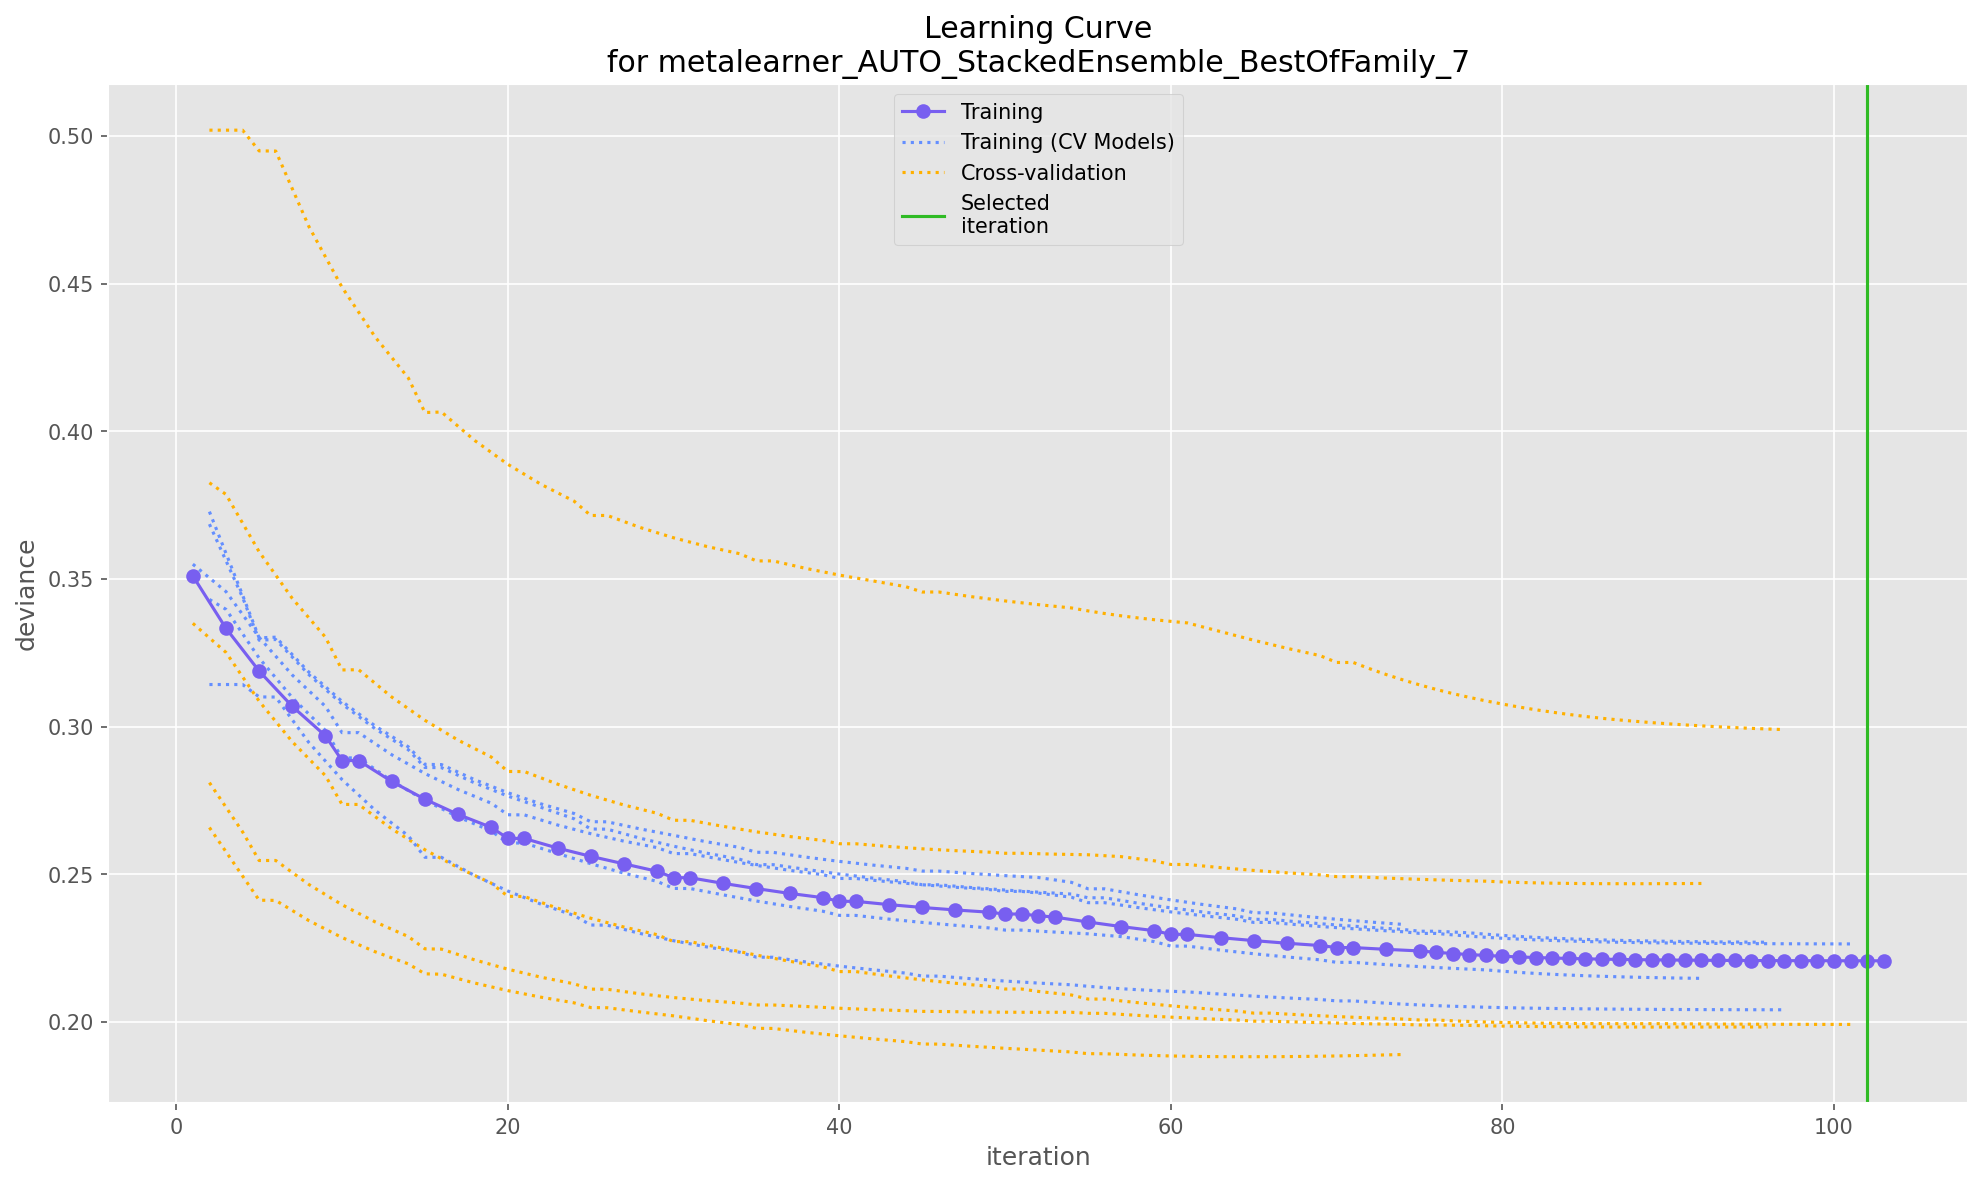

In [81]:
# Learning curve plot 

learning_curve_plot = model.learning_curve_plot()

In [82]:
# Make prediction

preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [83]:
# Combine the prediction with the test dataset

df = test.cbind(preds)

# Preview
df.head(10)

onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,predict,NON_SOZ,SOZ
NON_SOZ,0,0,0,3.20489e-05,1.16084e-05,3.87569e-06,6.27692e-06,3.83956e-06,1.39985e-07,8.9156e-06,2.33676e-06,6.25853,1.29774,1.06371,1.02711,1.03563,1.0964,1.00636,1.25197,1.09183,0.000243112,-8.03772e-05,-0.000347992,0.179689,0.86809,0.086552,0.999913,0.999966,0.833199,0.231566,0.798955,0.944879,0.892076,0.0976676,0.850117,0.959892,0.867141,0.0680822,0.825385,0.951704,0.87232,0.0619111,0.812669,0.947068,0.833113,0.0582501,0.742845,0.928782,0.671226,0.0522686,0.58832,0.881335,0.937528,0.0371571,0.918727,0.976702,0.886291,0.0143852,0.838765,0.964755,NON_SOZ,0.988353,0.0116473
NON_SOZ,1,1,2,8.7624e-05,4.07031e-05,1.08517e-05,1.25329e-05,9.47209e-06,1.90758e-07,5.32428e-06,1.37818e-06,11.8271,1.26272,1.06728,1.02468,1.03648,1.09253,1.00631,1.25221,1.0929,0.000454071,0.000795429,0.00346246,0.287235,0.901429,0.0900763,0.999757,0.999965,0.912136,0.181113,0.881972,0.970509,0.892557,0.0970242,0.843762,0.958109,0.8691,0.0751403,0.825349,0.945755,0.879891,0.0564734,0.816894,0.950356,0.863431,0.054181,0.782513,0.94176,0.7698,0.0398855,0.686078,0.911038,0.939167,0.0675358,0.917781,0.97361,0.900203,0.0193202,0.853753,0.965602,NON_SOZ,0.997771,0.0022294
NON_SOZ,0,1,1,1.46285e-06,5.47924e-07,2.72553e-07,3.14299e-07,9.68367e-08,3.36746e-09,6.07576e-07,1.60801e-07,5.29558,1.28657,1.07235,1.02184,1.03664,1.10084,1.00628,1.2554,1.09095,1.43775e-05,-2.76401e-05,0.000777435,0.0875532,0.90425,0.0742728,0.999987,1,0.905624,0.171837,0.878604,0.968809,0.856641,0.114456,0.81728,0.952331,0.880778,0.0706882,0.831643,0.955864,0.863873,0.060226,0.808071,0.948412,0.831038,0.0585207,0.748391,0.930722,0.792741,0.0393587,0.702085,0.918967,0.91402,0.12407,0.935912,0.976402,0.898676,0.0158401,0.858171,0.9699,NON_SOZ,0.997282,0.00271826
NON_SOZ,0,0,0,1.80809e-06,6.29646e-07,2.84385e-07,4.31741e-07,1.30481e-07,3.48023e-09,1.25842e-06,3.30984e-07,4.29606,1.27537,1.07152,1.02381,1.035,1.09521,1.0062,1.25728,1.0914,2.03062e-05,-0.000682222,-0.000116205,0.118156,0.90425,0.0742728,0.999987,1,0.905624,0.171837,0.878604,0.968809,0.856641,0.114456,0.81728,0.952331,0.880778,0.0706882,0.831643,0.955864,0.863873,0.060226,0.808071,0.948412,0.831038,0.0585207,0.748391,0.930722,0.792741,0.0393587,0.702085,0.918967,0.91402,0.12407,0.935912,0.976402,0.898676,0.0158401,0.858171,0.9699,NON_SOZ,0.997137,0.00286276
NON_SOZ,0,0,0,6.60332e-07,1.45521e-07,8.28151e-08,9.96235e-08,6.58201e-08,5.42473e-09,1.0153e-07,2.64541e-08,6.53519,1.30462,1.0657,1.02388,1.03914,1.09666,1.00617,1.25179,1.09041,6.90245e-06,-0.000339735,-0.00263589,0.131622,0.646871,0.139832,0.999999,1,0.575886,0.29442,0.624961,0.878712,0.704199,0.13045,0.680617,0.909112,0.708346,0.0926253,0.665976,0.906624,0.720893,0.0779694,0.644137,0.899638,0.548977,0.0776483,0.46929,0.851147,0.273993,0.0654245,0.290707,0.803572,0.853203,0.0583167,0.843407,0.959829,0.906212,0.0164269,0.854897,0.972752,NON_SOZ,0.996451,0.00354857
NON_SOZ,0,0,19,9.00789e-07,1.50357e-07,9.7326e-08,1.53369e-07,6.81423e-08,

In [84]:
# Create dataframe for first 20 predictions

df = h2o.as_list(df)

preds = df[['onset_channel', 'predict']].head(20)
preds

,onset_channel,predict
0,NON_SOZ,NON_SOZ
1,NON_SOZ,NON_SOZ
2,NON_SOZ,NON_SOZ
3,NON_SOZ,NON_SOZ
4,NON_SOZ,NON_SOZ
5,NON_SOZ,NON_SOZ
6,NON_SOZ,NON_SOZ
7,NON_SOZ,NON_SOZ
8,NON_SOZ,NON_SOZ
9,NON_SOZ,NON_SOZ


In [78]:
# Save the results

#df.to_csv('df.csv')
#preds.to_csv('preds.csv')

## CLASSIFICATION PROBLEM
Predicting "Onset_channel" in Montreal dataframe split by .75 ratio

In [85]:
# Parse dataframe df_montreal_drop to H2o

h2o_df = h2o.H2OFrame(df_montreal_drop)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [86]:
# Dataframe summary describe

h2o_df.describe()

Rows:2723
Cols:62




,onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_number
type,enum,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,,0.0,0.0,0.0,0.0527712976282284,0.0219268473859256,0.007363268794793,0.005939789969962,0.0032354480438427,0.0001138462018226,0.0002289194595936,6.730804667734005e-06,3.858667532602946,1.122020035982132,1.042570939262708,1.019092615445455,1.0248629808425904,1.066467293103536,1.005306360522906,1.007588633298874,1.059547833998998,0.1738684899415131,-0.0108316191674007,-0.0495011295057419,0.0033755314615835,-0.5919939587855091,0.0001677830344048,0.2385681683663278,0.7227412897348404,-0.3583188535630082,1.2975392178683858e-05,0.4665196905347208,0.8357105306784312,0.1077397739046621,8.709023608541126e-06,0.4297559625158707,0.8395196658372879,0.2891648745313189,8.48915192155649e-06,0.4690354175555209,0.8510342750946681,0.1898631923366338,9.50278950313077e-06,0.3433808049497505,0.8180417581399282,0.0292839441130278,2.587170952172831e-05,0.175352609710147,0.7806140915552775,-0.2331571758108718,0.0001089144819877,0.2334396188054233,0.7945465463399887,0.0334088295220378,7.778245516419702e-05,0.1838583501634032,0.7589430429538091,0.0041424488268967,0.0001241834152521,0.0761130808511128,0.6726663627227147,0.0
mean,,16.058758721997798,17.746970253396942,18.31913330885052,0.7021106305928958,0.6727257945571178,0.4892765381759585,0.8115725004257875,0.27665143014360866,0.01612932819522979,0.07098142663114793,0.012697378347259257,21.96089630991897,1.29503151950002,1.0662274480420804,1.023900848693294,1.034078069806715,1.098656632405444,1.00667042013919,1.1767593885259435,1.0788525886583815,0.4338268417976452,0.0004180100669354019,0.0006123419295672816,0.15048529885829853,0.7662791907437461,0.17494143447413293,0.734694049564671,0.9133384086316415,0.8903310458786742,0.1470812032652793,0.8850720790125252,0.9680162411547495,0.9476668124594223,0.046750049485609,0.9293162221230734,0.9820090776512471,0.965351454416421,0.023554563136898278,0.9497290818045498,0.9876131021787891,0.9727787427380606,0.015972302930402922,0.9555564185844408,0.9894035438492471,0.970235637027065,0.016366069366078748,0.9488625169991919,0.9876295785317669,0.9629619926956857,0.01007464938850331,0.9413095770084816,0.9855455036676655,0.9782860126206986,0.012470441840574194,0.9592393441549425,0.9893765182178929,0.9733879872636254,0.009733655768113907,0.9424784973034633,0.9833585762922338,0.0
maxs,,125.0,282.0,319.0,10.959303450771234,17.790643669107354,8.275868476444192,18.690419429107656,10.50078018898288,0.4428944890027342,1.941302207282672,0.3678725720543466,72.18727544784547,1.4569057909647625,1.0833529547850291,1.0314339596033095,1.0412024986743926,1.1172203421592712,1.0092319973309836,1.2995693794886272,1.1078993594646454,0.6463271533118354,0

In [87]:
# Split train and test sets

train, test = h2o_df.split_frame(ratios=[.75], seed=121)

# Define X and y

X = train.columns
y = 'onset_channel'
X.remove(y)

In [88]:
# For binary classification, response should be a factor

train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
y

'onset_channel'

In [90]:
# Review dataframe if balanced or not 

df_montreal_drop.onset_channel.value_counts()

NON_SOZ    2243
SOZ         480
Name: onset_channel, dtype: int64

In [91]:
# Import H2o AutoML

from h2o.automl import H2OAutoML

In [92]:
# Run H2o AutoML for 600 secs = 10 minutes

aml = H2OAutoML(max_runtime_secs=600,   
                balance_classes=True,
                stopping_metric='AUC',
                seed=121) 


%time aml.train(x=X, y=y, training_frame = train)

AutoML progress: |█
20:03:37.209: AutoML: XGBoost is not available; skipping it.
20:03:37.225: _train param, Dropping bad and constant columns: [segm_number]
20:03:38.949: _train param, Dropping bad and constant columns: [segm_number]
20:03:41.336: _train param, Dropping unused columns: [segm_number]
20:03:41.633: _train param, Dropping bad and constant columns: [segm_number]

███
20:03:44.162: _train param, Dropping bad and constant columns: [segm_number]
20:03:46.626: _train param, Dropping bad and constant columns: [segm_number]

██
20:03:49.323: _train param, Dropping bad and constant columns: [segm_number]
20:03:52.983: _train param, Dropping unused columns: [segm_number]
20:03:53.262: _train param, Dropping unused columns: [segm_number]

███
20:03:53.669: _train param, Dropping bad and constant columns: [segm_number]
20:03:56.936: _train param, Dropping bad and constant columns: [segm_number]

████
20:03:59.479: _train param, Dropping bad and constant columns: [segm_number]
20:04

,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,1705.0,0.0,0.0,(0.0/1705.0)
1,SOZ,0.0,339.0,0.0,(0.0/339.0)
2,Total,1705.0,339.0,0.0,(0.0/2044.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.782368,1.000000,124.0
1,max f2,0.782368,1.000000,124.0
2,max f0point5,0.782368,1.000000,124.0
3,max accuracy,0.782368,1.000000,124.0
4,max precision,0.999286,1.000000,0.0
5,max recall,0.782368,1.000000,124.0
6,max specificity,0.999286,1.000000,0.0
7,max absolute_mcc,0.782368,1.000000,124.0
8,max min_per_class_accuracy,0.782368,1.000000,124.0
9,max mean_per_class_accuracy,0.782368,1.000000,124.0



Gains/Lift Table: Avg response rate: 16.59 %, avg score: 19.10 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010274,0.998663,6.029499,6.029499,1.000000,0.999086,1.000000,0.999086,0.061947,0.061947,502.949853,502.949853,0.061947
1,2,0.020059,0.996654,6.029499,6.029499,1.000000,0.997718,1.000000,0.998419,0.058997,0.120944,502.949853,502.949853,0.120944
2,3,0.030333,0.994000,6.029499,6.029499,1.000000,0.995509,1.000000,0.997433,0.061947,0.182891,502.949853,502.949853,0.182891
3,4,0.040117,0.992381,6.029499,6.029499,1.000000,0.993126,1.000000,0.996383,0.058997,0.241888,502.949853,502.949853,0.241888
4,5,0.050391,0.989816,6.029499,6.029499,1.000000,0.991486,1.000000,0.995384,0.061947,0.303835,502.949853,502.949853,0.303835
5,6,0.100294,0.943089,6.029499,6.029499,1.000000,0.961637,1.000000,0.978593,0.300885,0.604720,502.949853,502.949853,0.604720
6,7,0.150196,0.893932,6.029499,6.029499,1.000000,0.921401,1.000000,0.959591,0.300885,0.905605,502.949853,502.949853,0.905605
7,8,0.200098,0.189930,1.891607,4.997555,0.313725,0.457784,0.828851,0.834446,0.094395,1.000000,89.160738,399.755501,0.958944
8,9,0.299902,0.073351,0.000000,3.334421,0.000000,0.111678,0.553018,0.593916,0.000000,1.000000,-100.000000,233.442088,0.839296
9,10,0.400196,0.043743,0.000000,2.498778,0.000000,0.056395,0.414425,0.459207,0.000000,1.000000,-100.000000,149.877751,0.719062




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.07452971039724977
RMSE: 0.2730013010907636
LogLoss: 0.24702824415422125
Null degrees of freedom: 2043
Residual degrees of freedom: 2034
Null deviance: 1840.6770585817412
Residual deviance: 1009.8514621024564
AIC: 1029.8514621024565
AUC: 0.9206974108772567
AUCPR: 0.7473940066632929
Gini: 0.8413948217545133

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25968015927893895: 


,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,1550.0,155.0,0.0909,(155.0/1705.0)
1,SOZ,82.0,257.0,0.2419,(82.0/339.0)
2,Total,1632.0,412.0,0.1159,(237.0/2044.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.259680,0.684421,209.0
1,max f2,0.159541,0.774722,254.0
2,max f0point5,0.476047,0.716282,146.0
3,max accuracy,0.476047,0.901174,146.0
4,max precision,0.999698,1.000000,0.0
5,max recall,0.000316,1.000000,399.0
6,max specificity,0.999698,1.000000,0.0
7,max absolute_mcc,0.259680,0.618602,209.0
8,max min_per_class_accuracy,0.161835,0.859238,253.0
9,max mean_per_class_accuracy,0.159541,0.861186,254.0



Gains/Lift Table: Avg response rate: 16.59 %, avg score: 16.59 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010274,0.965800,6.029499,6.029499,1.000000,0.979998,1.000000,0.979998,0.061947,0.061947,502.949853,502.949853,0.061947
1,2,0.020059,0.936429,5.728024,5.882438,0.950000,0.953123,0.975610,0.966888,0.056047,0.117994,472.802360,488.243759,0.117408
2,3,0.030333,0.903609,5.455261,5.737749,0.904762,0.923281,0.951613,0.952118,0.056047,0.174041,445.526057,473.774860,0.172282
3,4,0.040117,0.870450,5.125074,5.588316,0.850000,0.885003,0.926829,0.935749,0.050147,0.224189,412.507375,458.831571,0.220670
4,5,0.050391,0.830592,5.168142,5.502649,0.857143,0.853142,0.912621,0.918906,0.053097,0.277286,416.814159,450.264914,0.272008
5,6,0.100294,0.627179,4.019666,4.764774,0.666667,0.731907,0.790244,0.825863,0.200590,0.477876,301.966568,376.477444,0.452656
6,7,0.150196,0.425998,3.192087,4.242253,0.529412,0.509896,0.703583,0.720883,0.159292,0.637168,219.208745,324.225303,0.583796
7,8,0.200098,0.264128,2.246284,3.744481,0.372549,0.338115,0.621027,0.625425,0.112094,0.749263,124.628376,274.448075,0.658353
8,9,0.299902,0.121512,1.300480,2.931143,0.215686,0.180999,0.486134,0.477525,0.129794,0.879056,30.048007,193.114284,0.694305
9,10,0.400196,0.071110,0.470595,2.314502,0.078049,0.092789,0.383863,0.381106,0.047198,0.926254,-52.940499,131.450188,0.630653




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.883941,0.030358,0.926014,0.891960,0.870813,0.887781,0.843137
1,auc,0.920588,0.008370,0.922284,0.922530,0.930472,0.920328,0.907328
2,err,0.116059,0.030358,0.073986,0.108040,0.129187,0.112219,0.156863
3,err_count,47.400000,12.381437,31.000000,43.000000,54.000000,45.000000,64.000000
4,f0point5,0.654234,0.081988,0.753676,0.657895,0.668449,0.665939,0.525210
5,f1,0.700111,0.052396,0.725664,0.699301,0.735294,0.730539,0.609756
6,f2,0.759737,0.051445,0.699659,0.746269,0.816994,0.809019,0.726744
7,lift_top_group,5.932954,1.222074,6.983333,6.218750,3.934118,5.728571,6.800000
8,logloss,0.247090,0.016519,0.220448,0.244370,0.263240,0.250074,0.257315
9,max_per_class_error,0.192557,0.078270,0.316667,0.218750,0.132132,0.128571,0.166667



See the whole table with table.as_data_frame()


In [93]:
# H2o AutoML leaderboard 

lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_3_AutoML_3_20220821_200337,0.920697,0.247028,0.747394,0.166398,0.273001,0.0745297
StackedEnsemble_BestOfFamily_6_AutoML_3_20220821_200337,0.919602,0.247969,0.74476,0.179147,0.272258,0.0741245
StackedEnsemble_Best1000_1_AutoML_3_20220821_200337,0.919428,0.245411,0.753631,0.151606,0.271041,0.0734632
StackedEnsemble_AllModels_6_AutoML_3_20220821_200337,0.9191,0.245713,0.752927,0.148949,0.271549,0.0737387
StackedEnsemble_BestOfFamily_4_AutoML_3_20220821_200337,0.919025,0.249431,0.745525,0.162569,0.272474,0.0742419
StackedEnsemble_AllModels_4_AutoML_3_20220821_200337,0.91646,0.25019,0.742311,0.160766,0.273102,0.0745846
StackedEnsemble_AllModels_5_AutoML_3_20220821_200337,0.910978,0.26282,0.715378,0.158411,0.280277,0.0785553
StackedEnsemble_AllModels_2_AutoML_3_20220821_200337,0.909834,0.260416,0.725522,0.180587,0.278737,0.0776943
StackedEnsemble_AllModels_1_AutoML_3_20220821_200337,0.908557,0.26235,0.723455,0.165777,0.279304,0.0780109
StackedEnsemble_BestOfFamily_3_AutoML_3_20220821_200337,0.908538,0.263238,0.724996,0.192697,0.279494,0.0781168


In [94]:
# Explain a single H2O model (e.g. leader model from AutoML)

#exm = aml.leader.explain(test)

In [103]:
# Leader Deep Learning(DL) model 

model = h2o.get_model('StackedEnsemble_AllModels_3_AutoML_3_20220821_200337')

In [104]:
# Use Dl model on test set

model.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.08222038665333382
RMSE: 0.2867409748419884
LogLoss: 0.27697678274935617
Null degrees of freedom: 678
Residual degrees of freedom: 670
Null deviance: 701.7848762799969
Residual deviance: 376.13447097362564
AIC: 394.13447097362564
AUC: 0.9158691238893722
AUCPR: 0.7999535143722509
Gini: 0.8317382477787445

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29906932783489726: 


,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,494.0,44.0,0.0818,(44.0/538.0)
1,SOZ,36.0,105.0,0.2553,(36.0/141.0)
2,Total,530.0,149.0,0.1178,(80.0/679.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.299069,0.724138,137.0
1,max f2,0.162518,0.789817,182.0
2,max f0point5,0.598803,0.780952,86.0
3,max accuracy,0.488736,0.895434,102.0
4,max precision,0.985260,1.000000,0.0
5,max recall,0.002074,1.000000,391.0
6,max specificity,0.985260,1.000000,0.0
7,max absolute_mcc,0.488736,0.662717,102.0
8,max min_per_class_accuracy,0.170829,0.851064,179.0
9,max mean_per_class_accuracy,0.162518,0.853799,182.0



Gains/Lift Table: Avg response rate: 20.77 %, avg score: 19.40 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010309,0.964247,4.815603,4.815603,1.000000,0.976674,1.000000,0.976674,0.049645,0.049645,381.560284,381.560284,0.049645
1,2,0.020619,0.946081,4.815603,4.815603,1.000000,0.954921,1.000000,0.965798,0.049645,0.099291,381.560284,381.560284,0.099291
2,3,0.030928,0.938615,4.815603,4.815603,1.000000,0.942397,1.000000,0.957997,0.049645,0.148936,381.560284,381.560284,0.148936
3,4,0.041237,0.914867,4.815603,4.815603,1.000000,0.924905,1.000000,0.949724,0.049645,0.198582,381.560284,381.560284,0.198582
4,5,0.050074,0.876189,4.013002,4.673967,0.833333,0.896280,0.970588,0.940293,0.035461,0.234043,301.300236,367.396746,0.232184
5,6,0.100147,0.744122,3.682520,4.178244,0.764706,0.817455,0.867647,0.878874,0.184397,0.418440,268.251982,317.824364,0.401711
6,7,0.150221,0.559617,3.682520,4.013002,0.764706,0.659577,0.833333,0.805775,0.184397,0.602837,268.251982,301.300236,0.571238
7,8,0.200295,0.347285,1.841260,3.470067,0.382353,0.437314,0.720588,0.713660,0.092199,0.695035,84.125991,247.006675,0.624403
8,9,0.300442,0.158456,1.628807,2.856313,0.338235,0.238172,0.593137,0.555164,0.163121,0.858156,62.880684,185.631345,0.703881
9,10,0.400589,0.085967,0.354088,2.230757,0.073529,0.116658,0.463235,0.445537,0.035461,0.893617,-64.591156,123.075720,0.622242


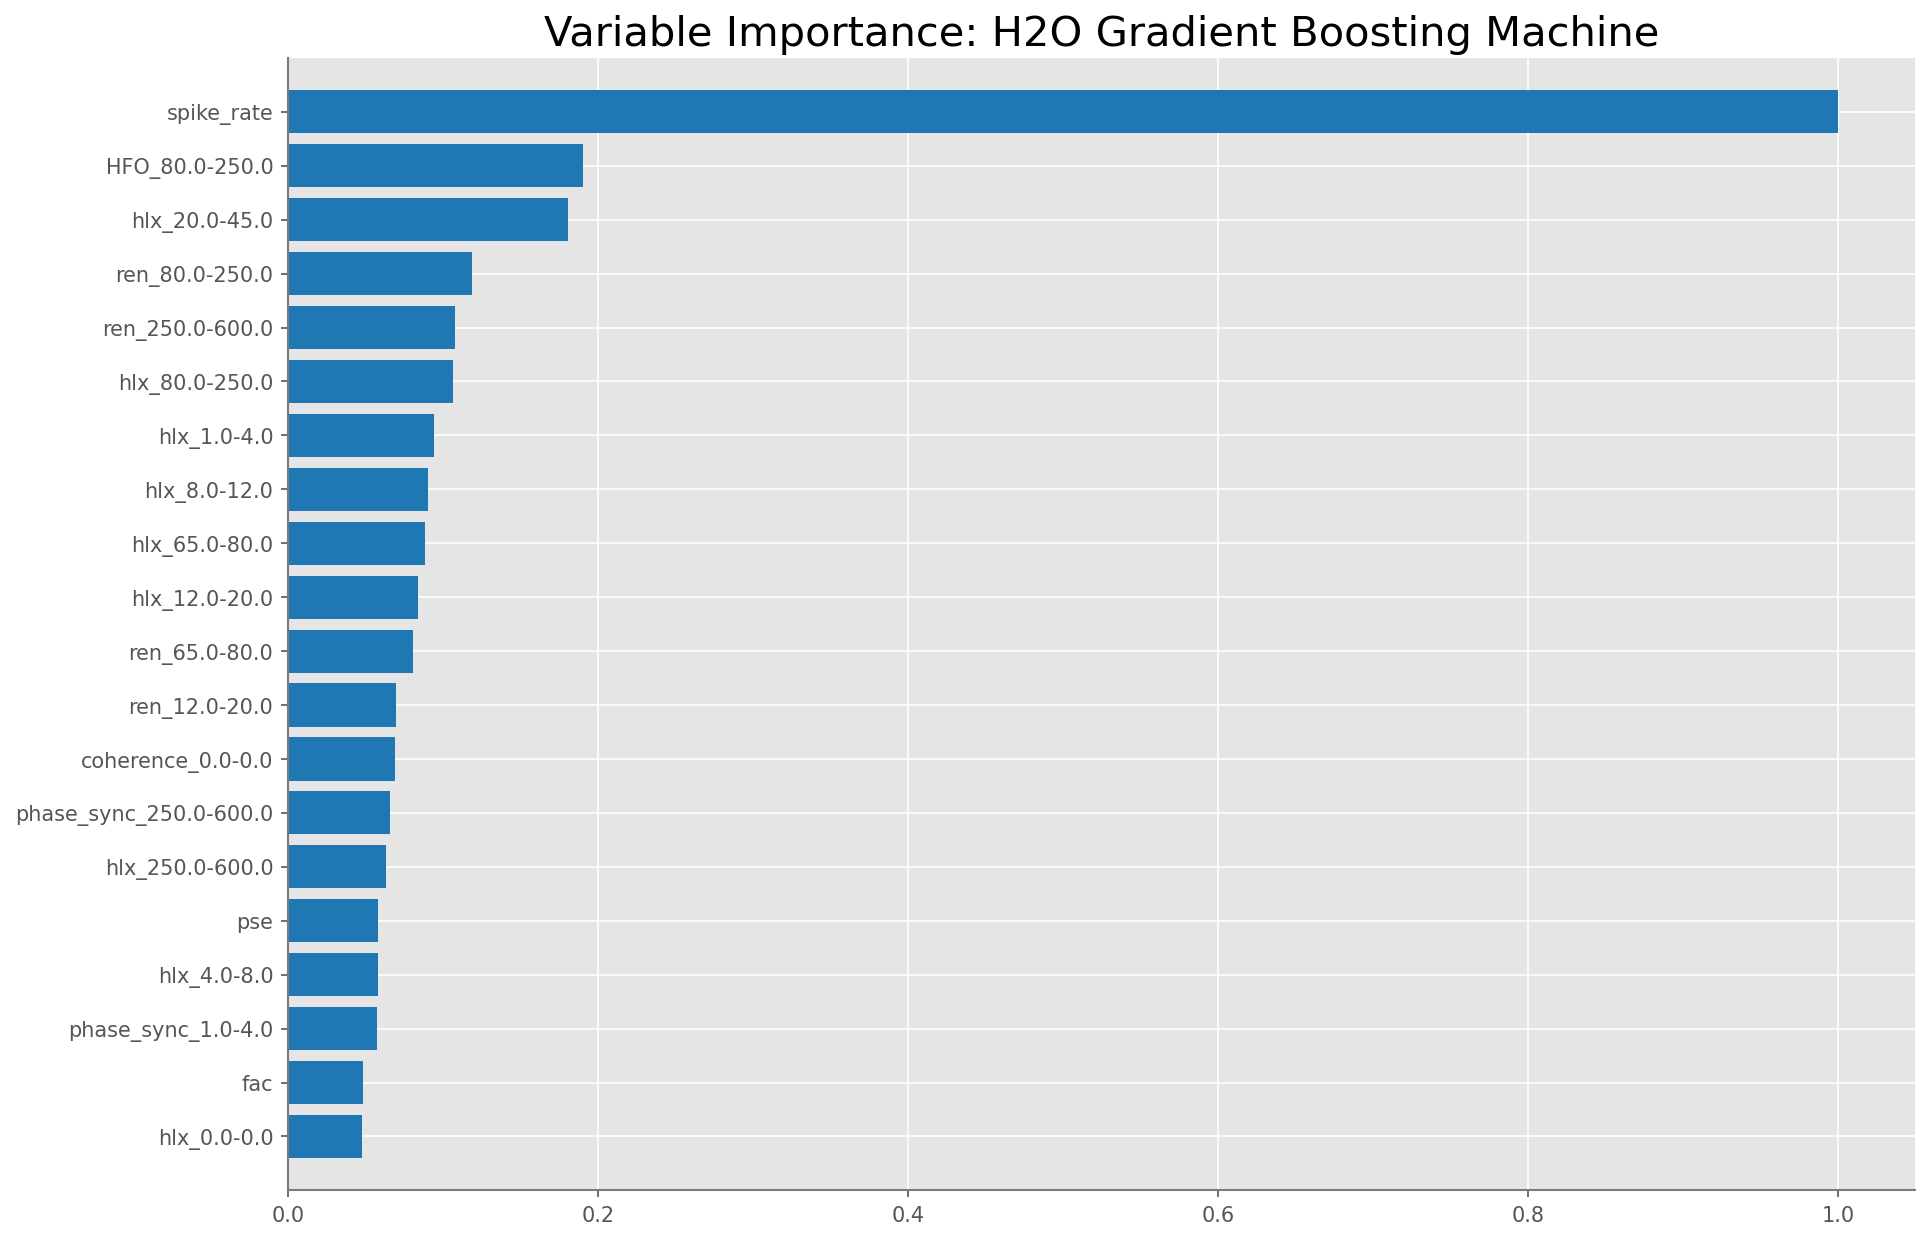

<Figure size 2100x1050 with 0 Axes>

In [97]:
# Show variable importance

model.varimp_plot(num_of_features=20)

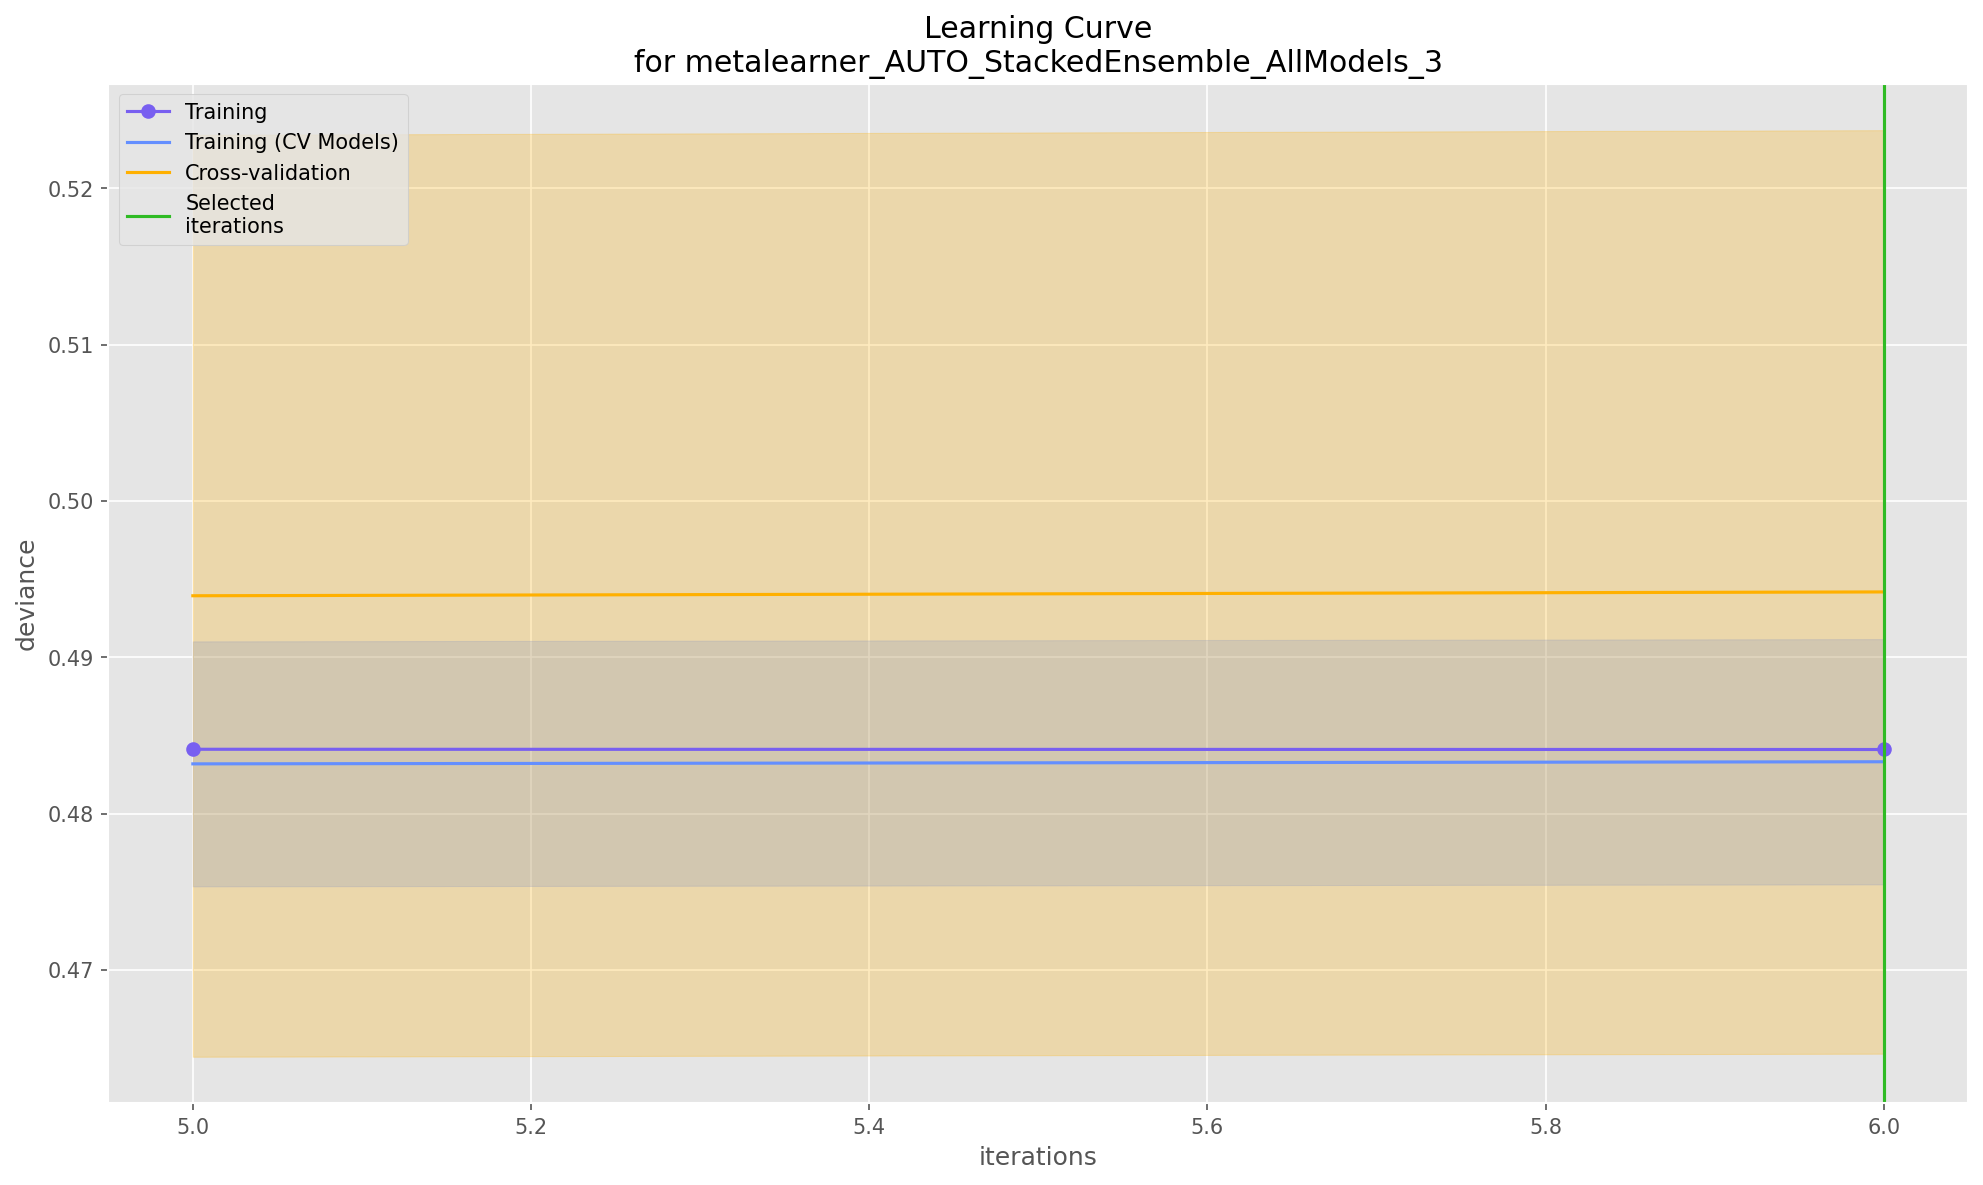

In [106]:
# Learning curve plot 

learning_curve_plot = model.learning_curve_plot()

In [107]:
# Make prediction

preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [108]:
# Combine the prediction with the test dataset

df = test.cbind(preds)

# Preview
df.head(10)

onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_number,predict,NON_SOZ,SOZ
NON_SOZ,35,62,86,0.560877,0.560381,0.3744,0.447637,0.290251,0.00965829,0.0281617,0.00876111,26.4752,1.25286,1.0785,1.02606,1.03547,1.07947,1.00598,1.24258,1.07312,0.441761,0.00313479,-0.00548004,0.102846,0.978348,0.0479904,0.948727,0.9882,0.989236,0.0662627,0.973169,0.994963,0.997894,0.0075296,0.993914,0.999078,0.999242,0.0019503,0.997857,0.999655,0.999592,0.000850235,0.998064,0.999816,0.999672,0.000506324,0.998218,0.999838,0.999292,0.000575785,0.997157,0.999653,0.997199,0.00192899,0.989986,0.99841,0.982513,0.00784882,0.952962,0.988048,0,NON_SOZ,0.99762,0.00237955
NON_SOZ,15,76,45,0.648182,0.616408,0.337676,0.396057,0.24885,0.00826613,0.0221063,0.00661091,15.1434,1.25973,1.07162,1.02614,1.03556,1.08026,1.00587,1.2374,1.07312,0.496645,0.000428038,-0.00730114,0.319619,0.762571,0.185762,0.680316,0.909484,0.892754,0.186641,0.855289,0.960701,0.952967,0.0606993,0.917244,0.981221,0.978094,0.0265737,0.952522,0.990766,0.987898,0.0129758,0.967892,0.994523,0.988419,0.00950377,0.964233,0.994267,0.984092,0.00705421,0.958436,0.992445,0.981385,0.00834344,0.951208,0.989556,0.981049,0.00791369,0.950002,0.986978,0,NON_SOZ,0.977406,0.0225943
NON_SOZ,15,44,17,0.620751,0.367918,0.222924,0.279673,0.15008,0.00525093,0.0145513,0.00426167,10.6422,1.30758,1.07139,1.0254,1.03369,1.07779,1.00609,1.23754,1.0742,0.52973,-0.000565142,0.000834135,0.521922,0.663613,0.26622,0.602938,0.864254,0.803896,0.257393,0.777373,0.93838,0.910431,0.0843412,0.860211,0.967216,0.937628,0.0486327,0.896948,0.976355,0.912354,0.0510814,0.865911,0.96647,0.896725,0.0470376,0.82594,0.955013,0.899246,0.0269239,0.830018,0.954675,0.897928,0.0382108,0.817422,0.947423,0.943453,0.0192913,0.881119,0.962862,0,NON_SOZ,0.987505,0.0124945
NON_SOZ,8,52,10,0.273952,0.464166,0.314305,0.407133,0.296543,0.013292,0.0394154,0.0120616,19.2703,1.25638,1.07131,1.02561,1.03443,1.08415,1.00596,1.24414,1.07327,0.492894,-0.000843559,0.00243306,0.519467,0.95838,0.058598,0.912968,0.976699,0.991832,0.0474314,0.983126,0.996682,0.997325,0.00895203,0.99215,0.998893,0.996508,0.00564977,0.990852,0.99832,0.997475,0.00302311,0.99265,0.998984,0.999249,0.000850037,0.996912,0.999633,0.999391,0.000497475,0.997513,0.999694,0.997148,0.00230553,0.989489,0.998365,0.982287,0.00748165,0.952452,0.98786,0,NON_SOZ,0.993645,0.00635548
NON_SOZ,15,53,10,0.260961,0.484789,0.338336,0.4408,0.318347,0.0142781,0.0426411,0.0131099,18.2572,1.26289,1.07,1.02559,1.03429,1.08426,1.00594,1.24404,1.07321,0.503786,-0.000440529,0.00236717,0.705077,0.982787,0.0316551,0.958346,0.990927,0.997292,0.0199692,0.994083,0.998835,0.99901,0.00402715,0.996111,0.999573,0.999033,0.00240488,0.996661,0.999569,0.998976,0.00143031,0.996415,0.999602,0.999563,0.000577994,0.998036,0.999786,0.999545,0.000392347,0.998003,0.999773,0.997232,0.00199155,0.990044,0.998414,0.981752,0.00850463,0.951552,0.987475,0,NON_SOZ,0.999172,0.000827797
NON_SOZ,2,41,10,0.465971,0.673746,0.501541,0.650557,0.414319,0.0191972,0.0562656,0.0168575

In [109]:
# Create dataframe for first 20 predictions

df = h2o.as_list(df)

preds = df[['onset_channel', 'predict']].head(20)
preds

,onset_channel,predict
0,NON_SOZ,NON_SOZ
1,NON_SOZ,NON_SOZ
2,NON_SOZ,NON_SOZ
3,NON_SOZ,NON_SOZ
4,NON_SOZ,NON_SOZ
5,NON_SOZ,NON_SOZ
6,NON_SOZ,NON_SOZ
7,NON_SOZ,NON_SOZ
8,NON_SOZ,NON_SOZ
9,NON_SOZ,NON_SOZ


In [110]:
# Save the results

#df.to_csv('df.csv')
#preds.to_csv('preds.csv')